Story is that, one of my roommate "Jaber" who playing video games too much and love it much also. One day he came into my room and asked me about some stat and figure about video games, i said bro i dont know much about video games sorry for that but i can help you another way, that i know a good data sate which have much info about games.
so i can show you this data set and you ask me whatever you want to know i will try to find out. ok?
He was very happy on my offer. and he just starting many question at once. i said wait bro i need to go import them first to start analysis. be patient

In [41]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_column', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

input/vgsales.csv


In [42]:
data = pd.read_csv('input/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Me => See, here is your video games data

In [43]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

- Me => Deleted some incomplete data. You can see, from 2016 the data we have those are not fully completed
- Jaber => Is it necessary?
- Me => Yes, it will help us to do better analysis. Incomplete data always hamper in analysis

In [44]:
data.shape

(16250, 11)

- Me => total 11 columns and 16598 rows. which is actually good enough.
- Jber => what does that mean of the 11 columns. What EU_Sales, JP_Sales means, i don't understand all of them.
- Me => Ok i will tell you about them with in a second.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Their fields and data types are:

- Rank - Ranking of overall sales, integer

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.), object

- Year - Year of the game's release, float

- Genre - Genre of the game ,object

- Publisher - Publisher of the game, object

- NA_Sales - Sales in North America (in millions), float

- EU_Sales - Sales in Europe (in millions), float

- JP_Sales - Sales in Japan (in millions), float

- Other_Sales - Sales in the rest of the world (in millions), float

- Global_Sales - Total worldwide sales, float

- Jaber => Now i understand meaning of columns names but why you told me their types 🤔.
- Me => Ha ha, its not for you, its for me. to understand what kind of data types i get for analysis. and i see most of them are float and integer which help me lot.
- Jaber => 🙄 🙄

In [46]:
#data.describe()
#data.describe(include=['object', 'bool'])
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Me => Happy news for you Jaber, we don't have much missing values. that means we are not losing much information. see i told you it's already good readymade dataset.

- Jaber => 😡😡 Why you told me too many unnecessary information, When can I ask my question?
- Me => Hmmm hmm, Just Now.

He started his unstoppable questions bank for me, here it's started.

## 1. What genre games have been made the most?

In [47]:
data['Genre'].value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

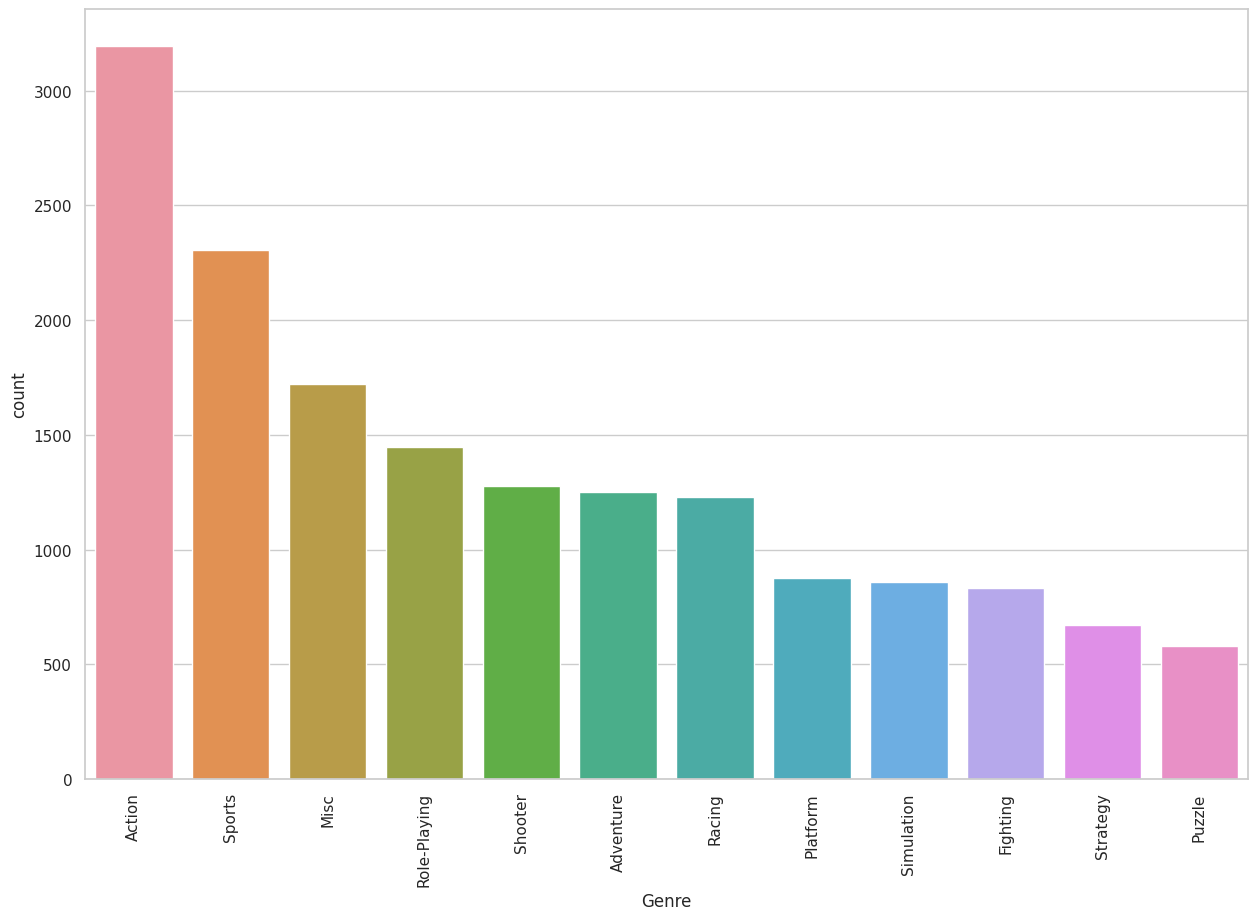

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Answer is => "Action" and "Sports"
- Me => I see, most of the people love action and sports game. in action 3316 and in sports 2346 games release. which one your favorite.
- Jaber => Action
- Me => I thought so too, Next?

### 2. Which year had the most game release?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

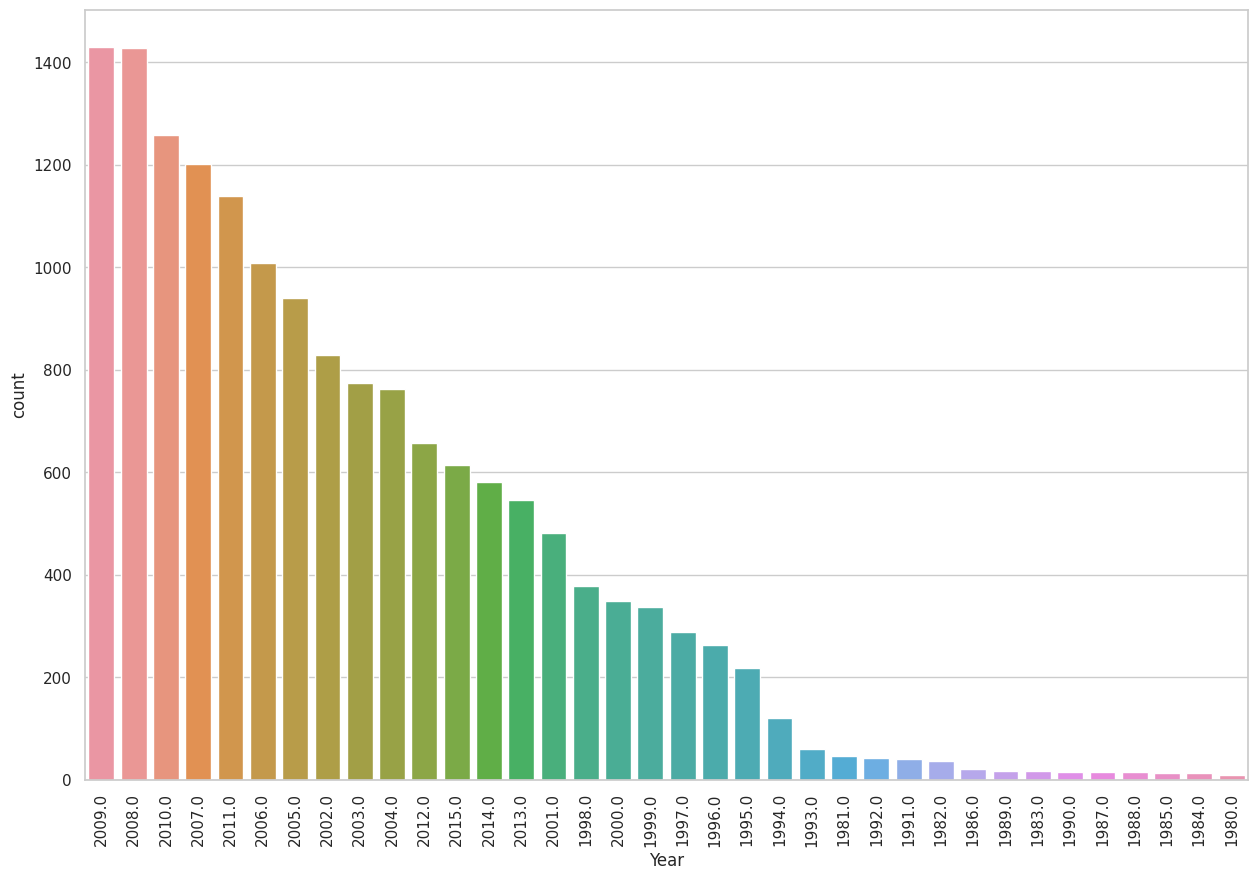

In [49]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Year', data=data, order=data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

Answer is =>
1. 2009.0 -> 1431
2. 2008.0 -> 1428
3. 2010.0 -> 1259
4. 2007.0 -> 1202
5. 2011.0 -> 1139

Me => its seems like that 2008 to 2010 was game lovers years. and you know jaber, i can show you one interesting things also.
### 3. Top 5 Years games release by genre

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

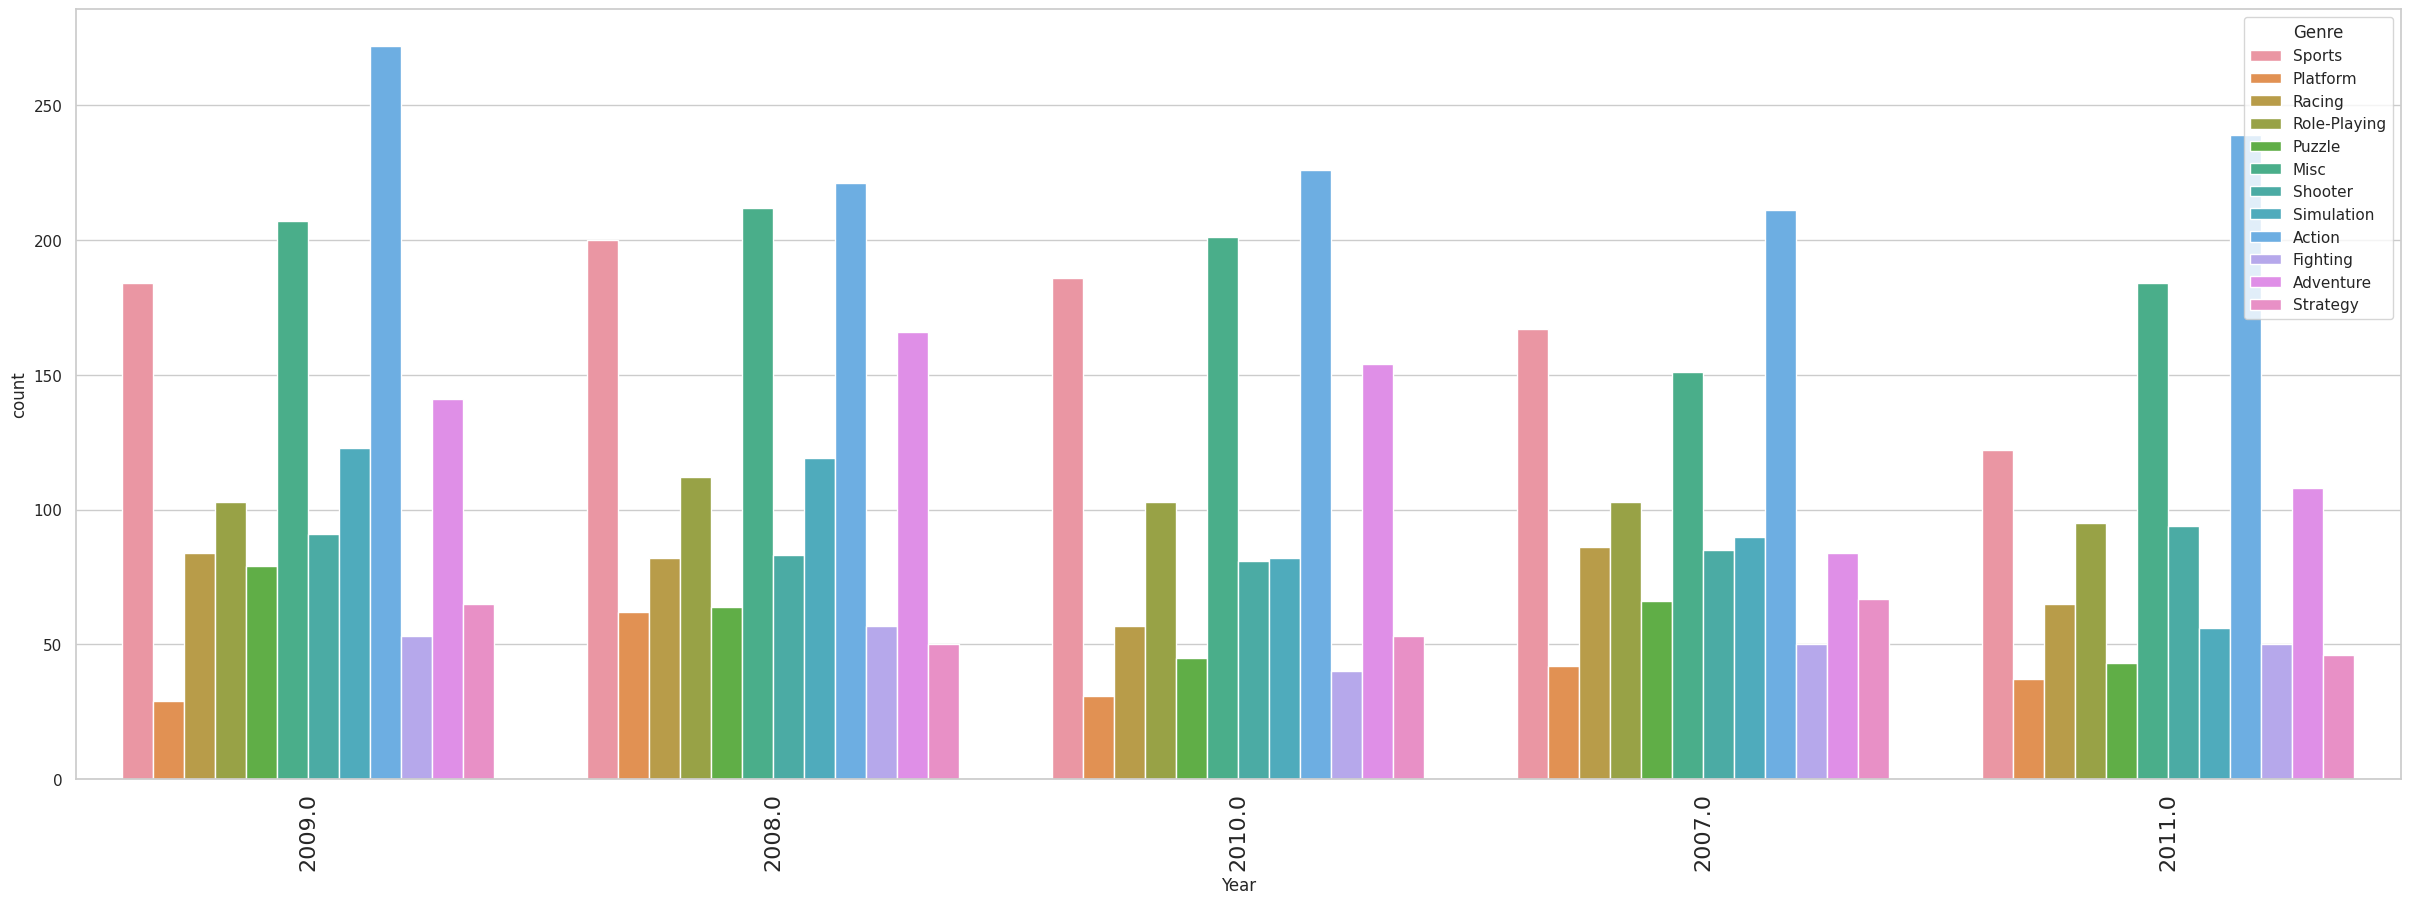

In [50]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Year', data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

- Me => ??
- Jaber => Wow thats nice and action was always top.
- Me => Ask your next question? i'm in mood now.

### 4. Which year had the hightest sales worldwide?

In [51]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

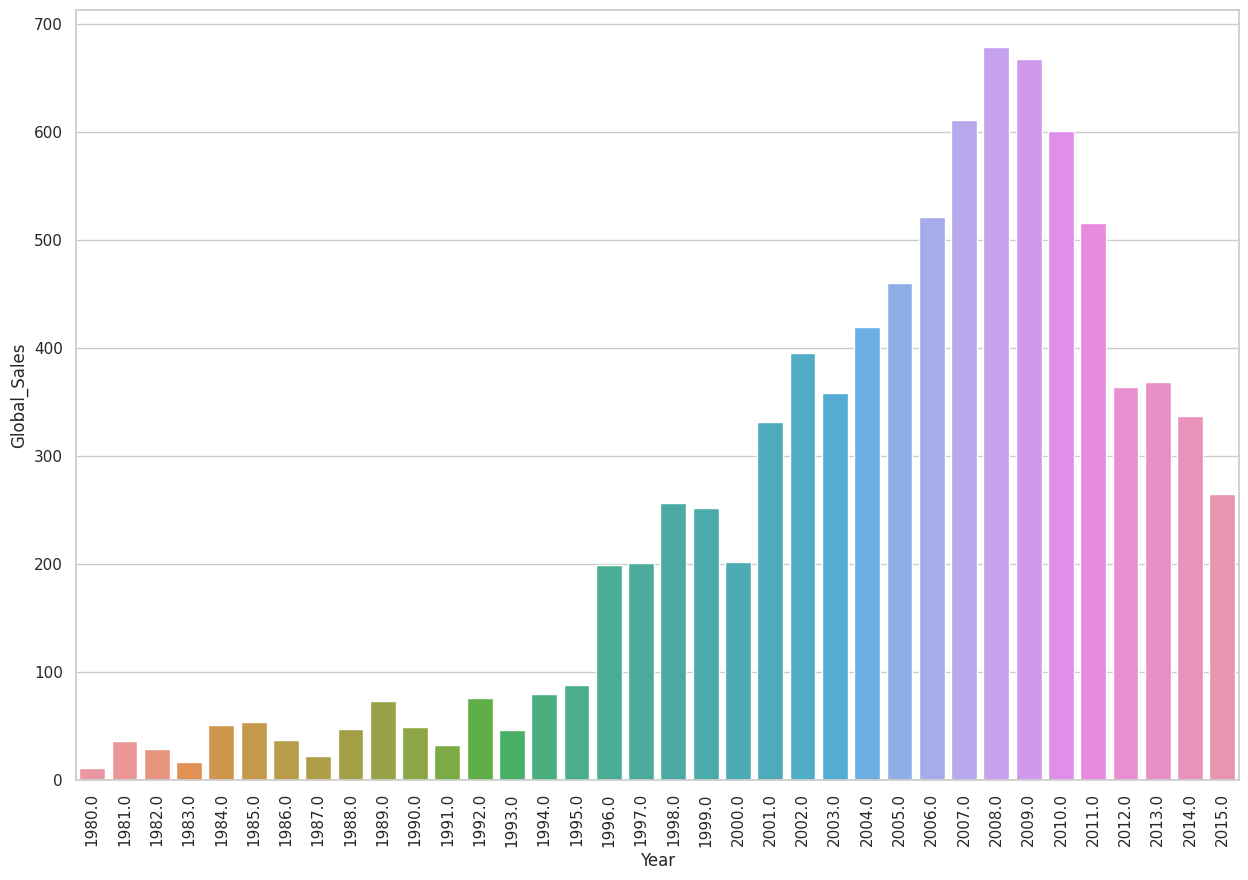

In [52]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Year', y='Global_Sales', data=data_year)
plt.xticks(rotation=90)

Answer is =>
1. 2008.0 678.90
2. 2009.0 667.30
3. 2007.0 611.13
4. 2010.0 600.45
5. 2006.0 521.04
- interesting 2006 was not in top 5 game release year but it is in top 5 highest sale year
### 5. Which genre game has been released the most in a single year?

In [53]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=['Year', 'count'], keep='last').reset_index(drop=True)

In [54]:
genre = year_max_genre['Genre'].values

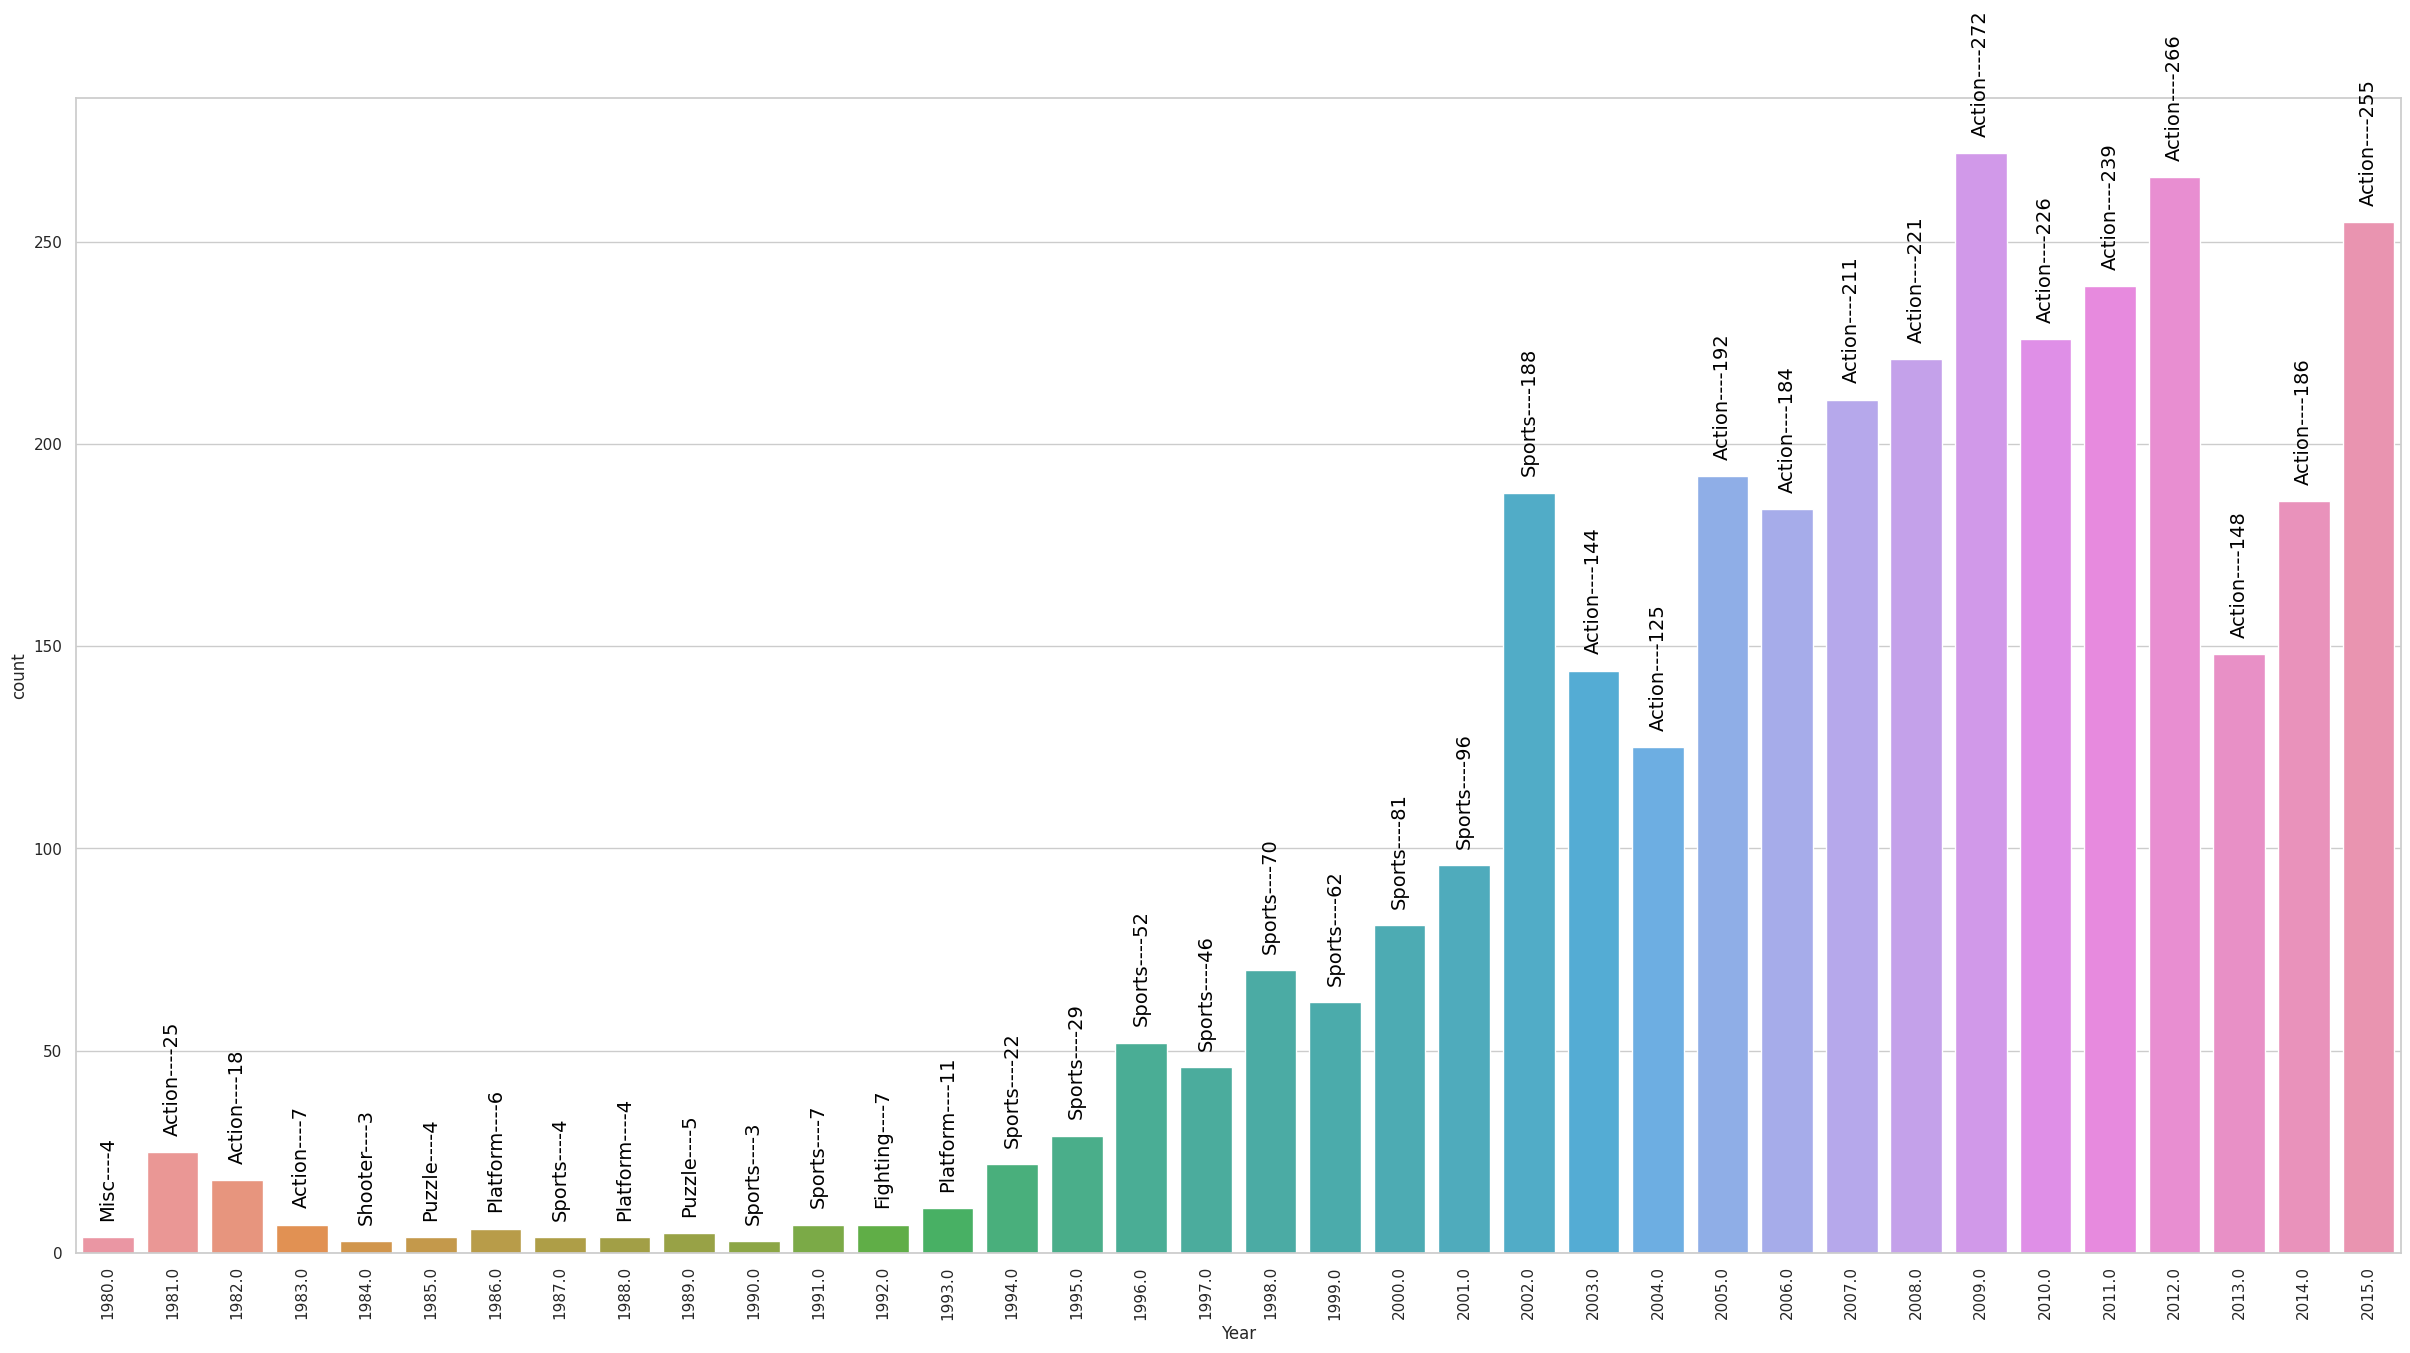

In [55]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
    g.text(index, value+5, str(genre[index] + '----' + str(value)), color='#000', size=14, rotation=90, ha='center')
    index += 1

plt.xticks(rotation = 90)
plt.show()

Answer is => 2009 Action ---> 272 and 2012 Action ---> 266 games are release.
### 6. Which genre game has sold the most in a single year?¶

In [56]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [57]:
genre = year_sale_max['Genre']

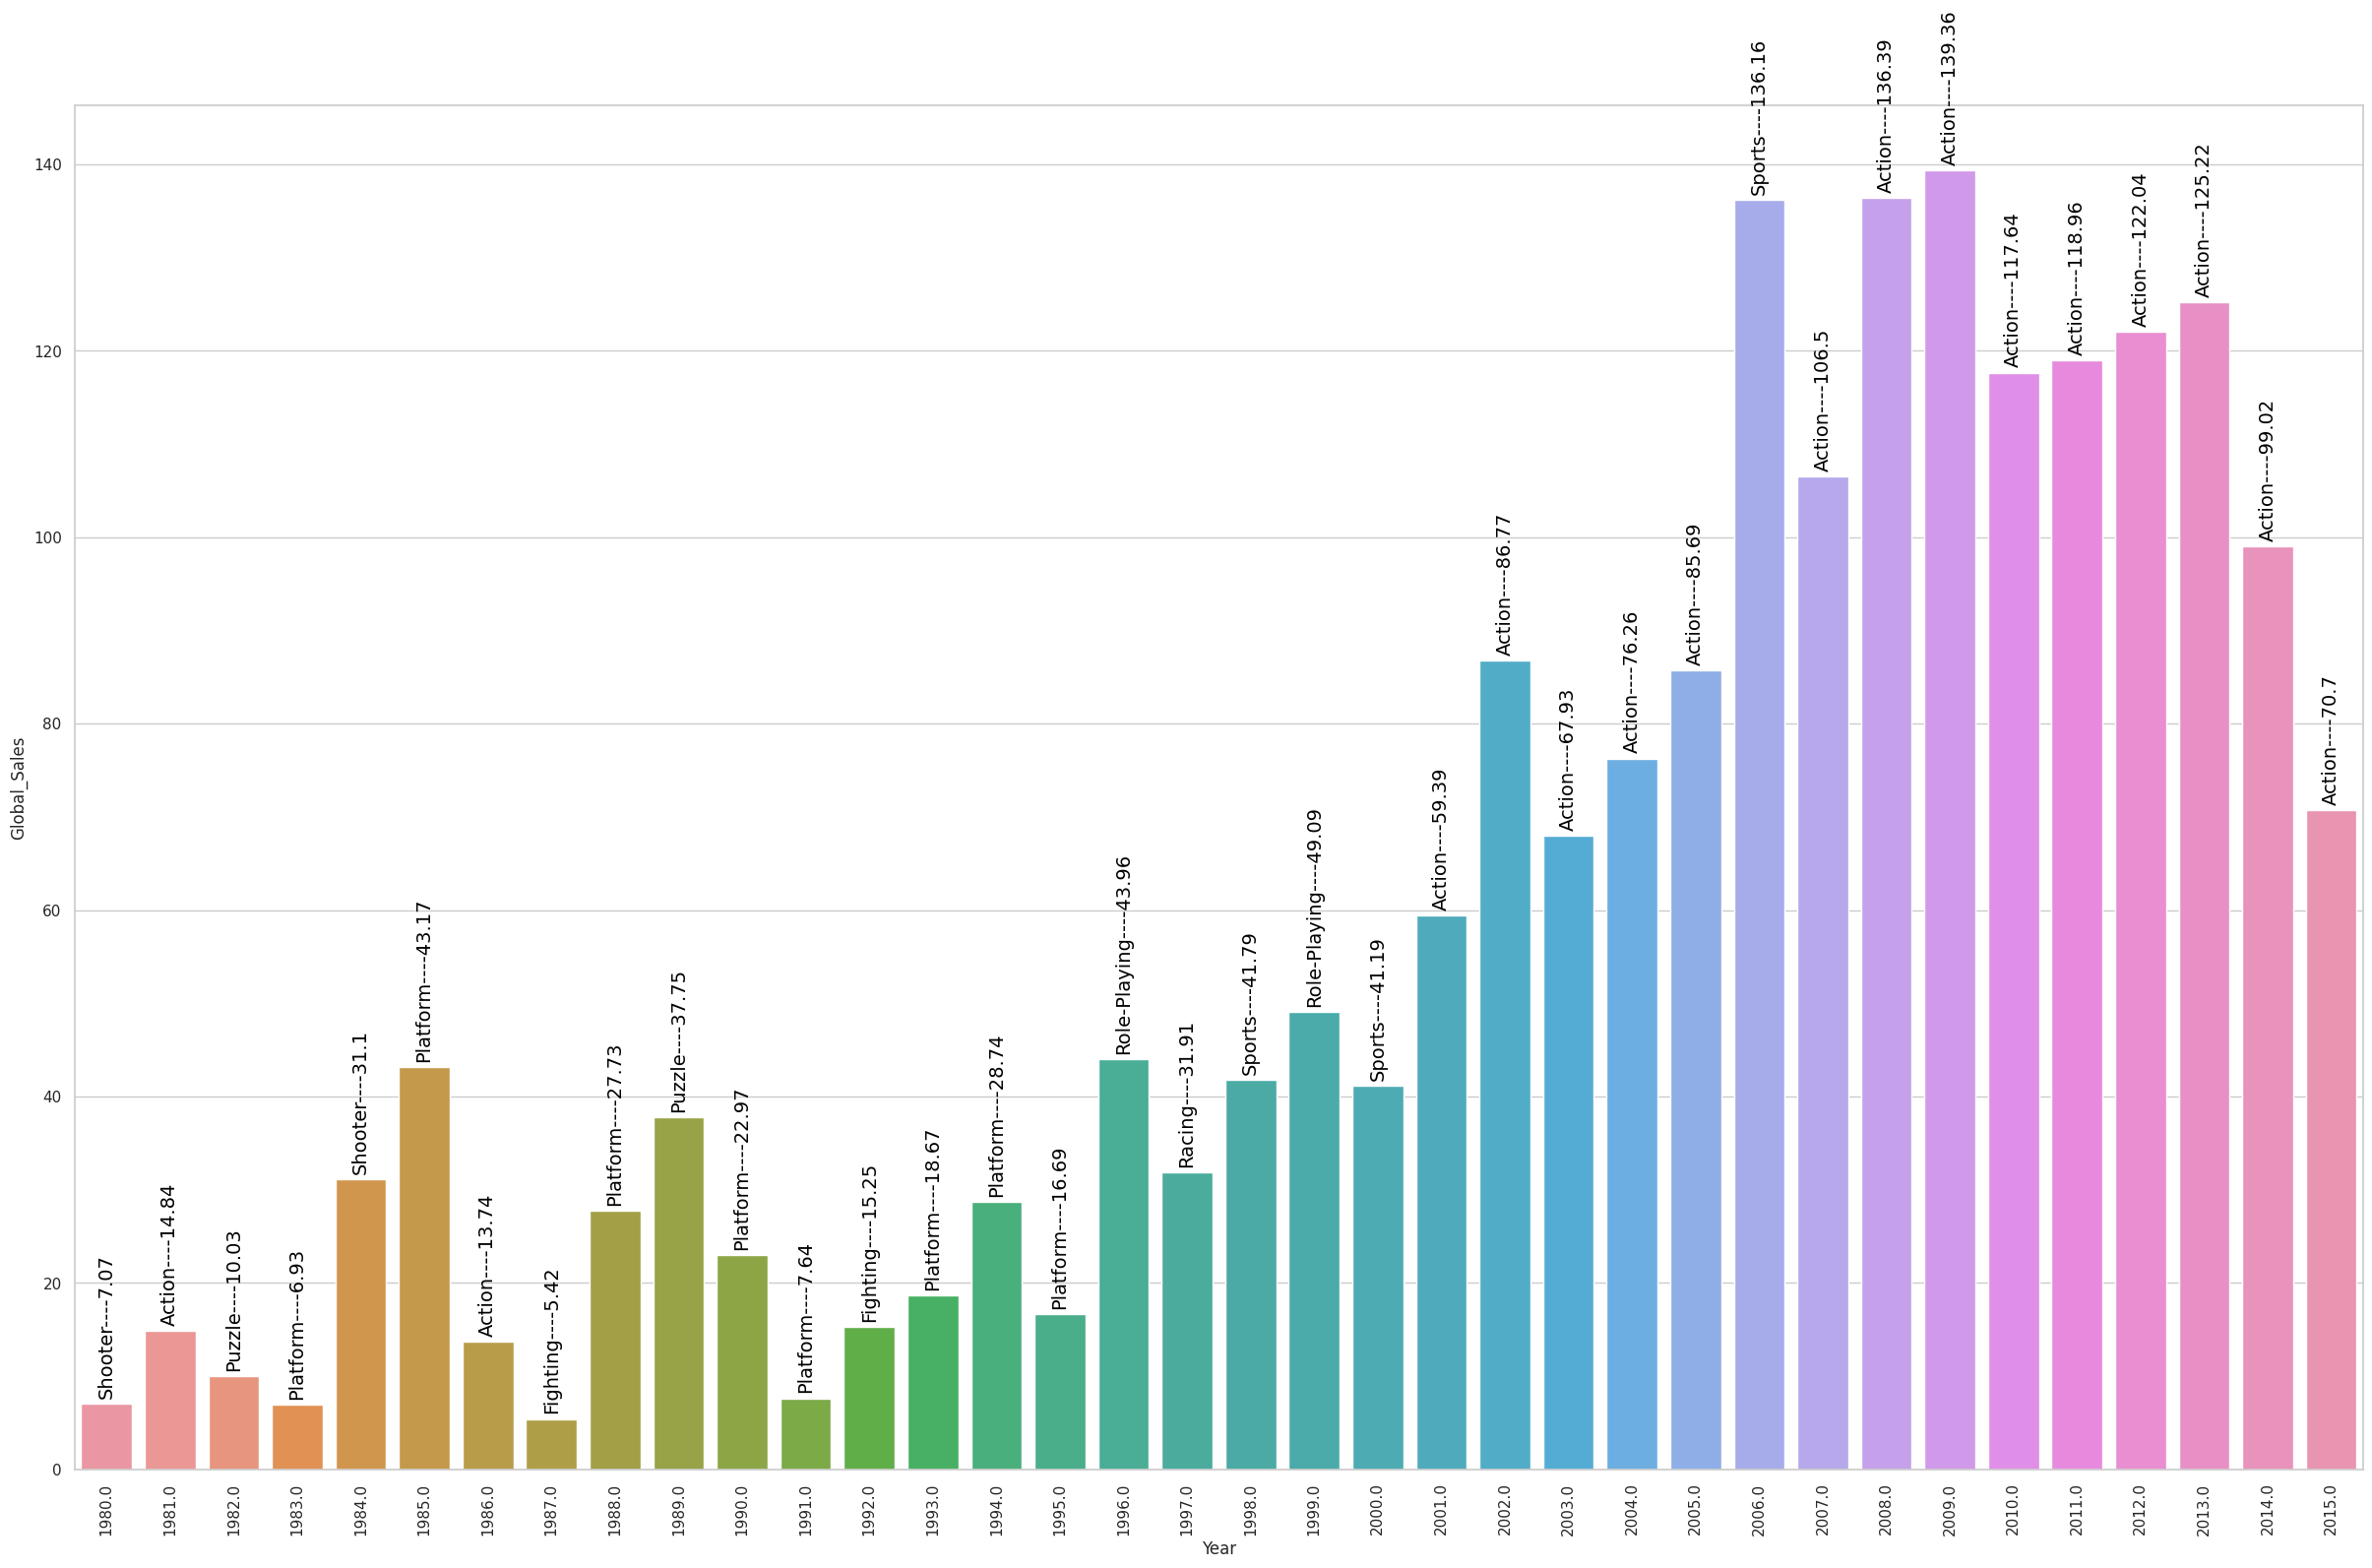

In [58]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data = year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' + str(round(value, 2))), color='#000', size=14, rotation=90, ha='center')
    index += 1

plt.xticks(rotation=90)
plt.show()

- Answer is => 2009 Action ---> 139.36 million and 2008 Action ---> 136.39 miliion .

### 7. Which genre game have the highest sale price globally

In [59]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

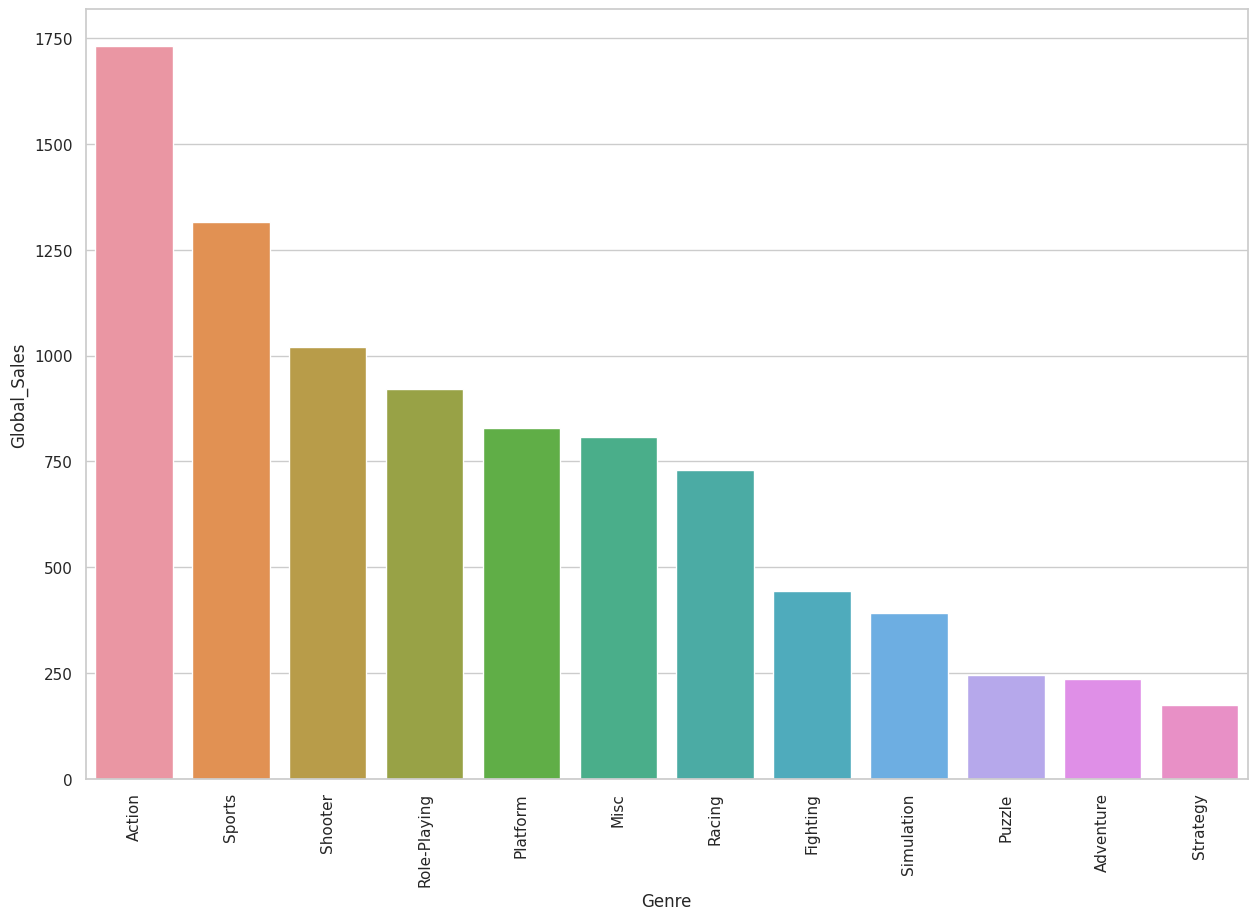

In [60]:
plt.figure(figsize = (15, 10))
sns.barplot(x = 'Genre', y = 'Global_Sales', data = data_genre)
plt.xticks(rotation=90)

- Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5
### 8. Which platfrom have the highest sale price globally

In [61]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

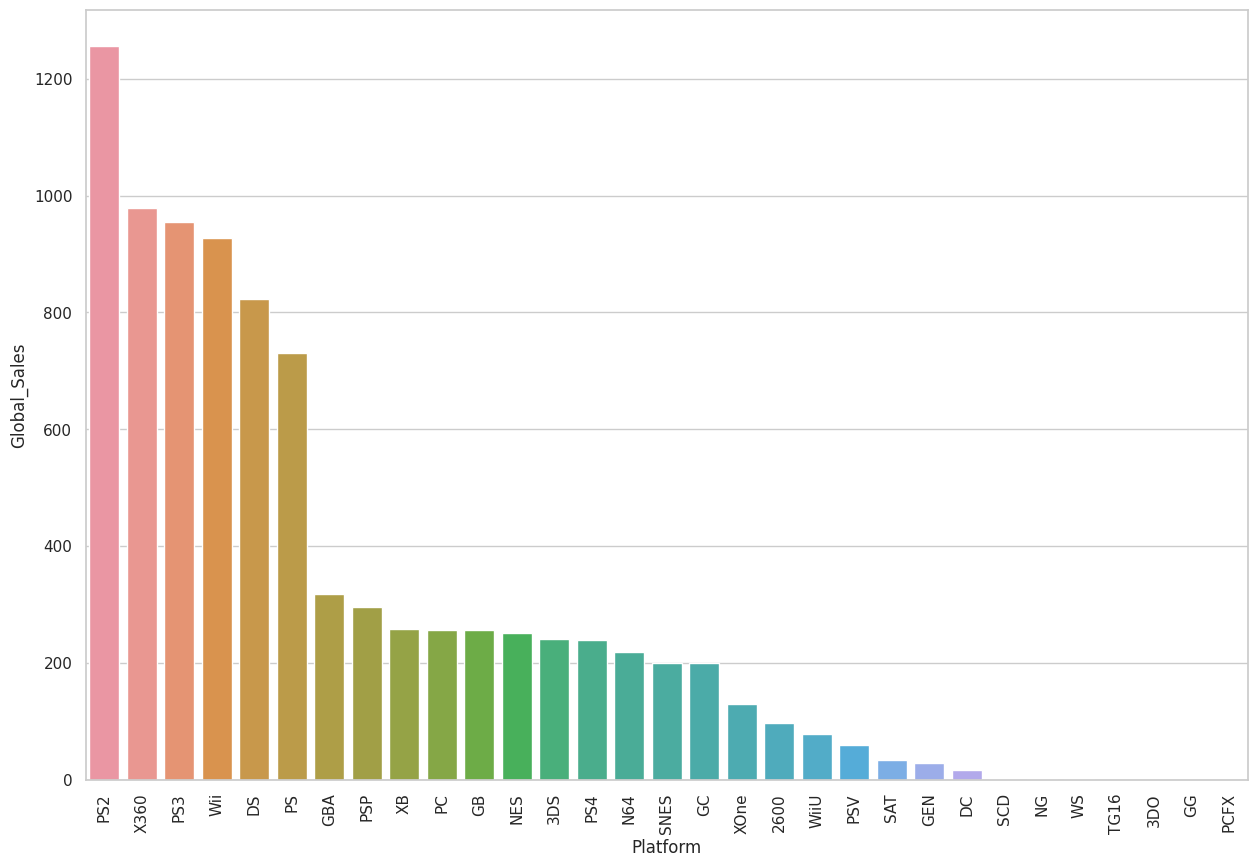

In [62]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Platform', y='Global_Sales', data=data_platform)
plt.xticks(rotation=90)

- The winner is PS2
### 9. Which individual game have the highest sale price globally?

In [63]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [64]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

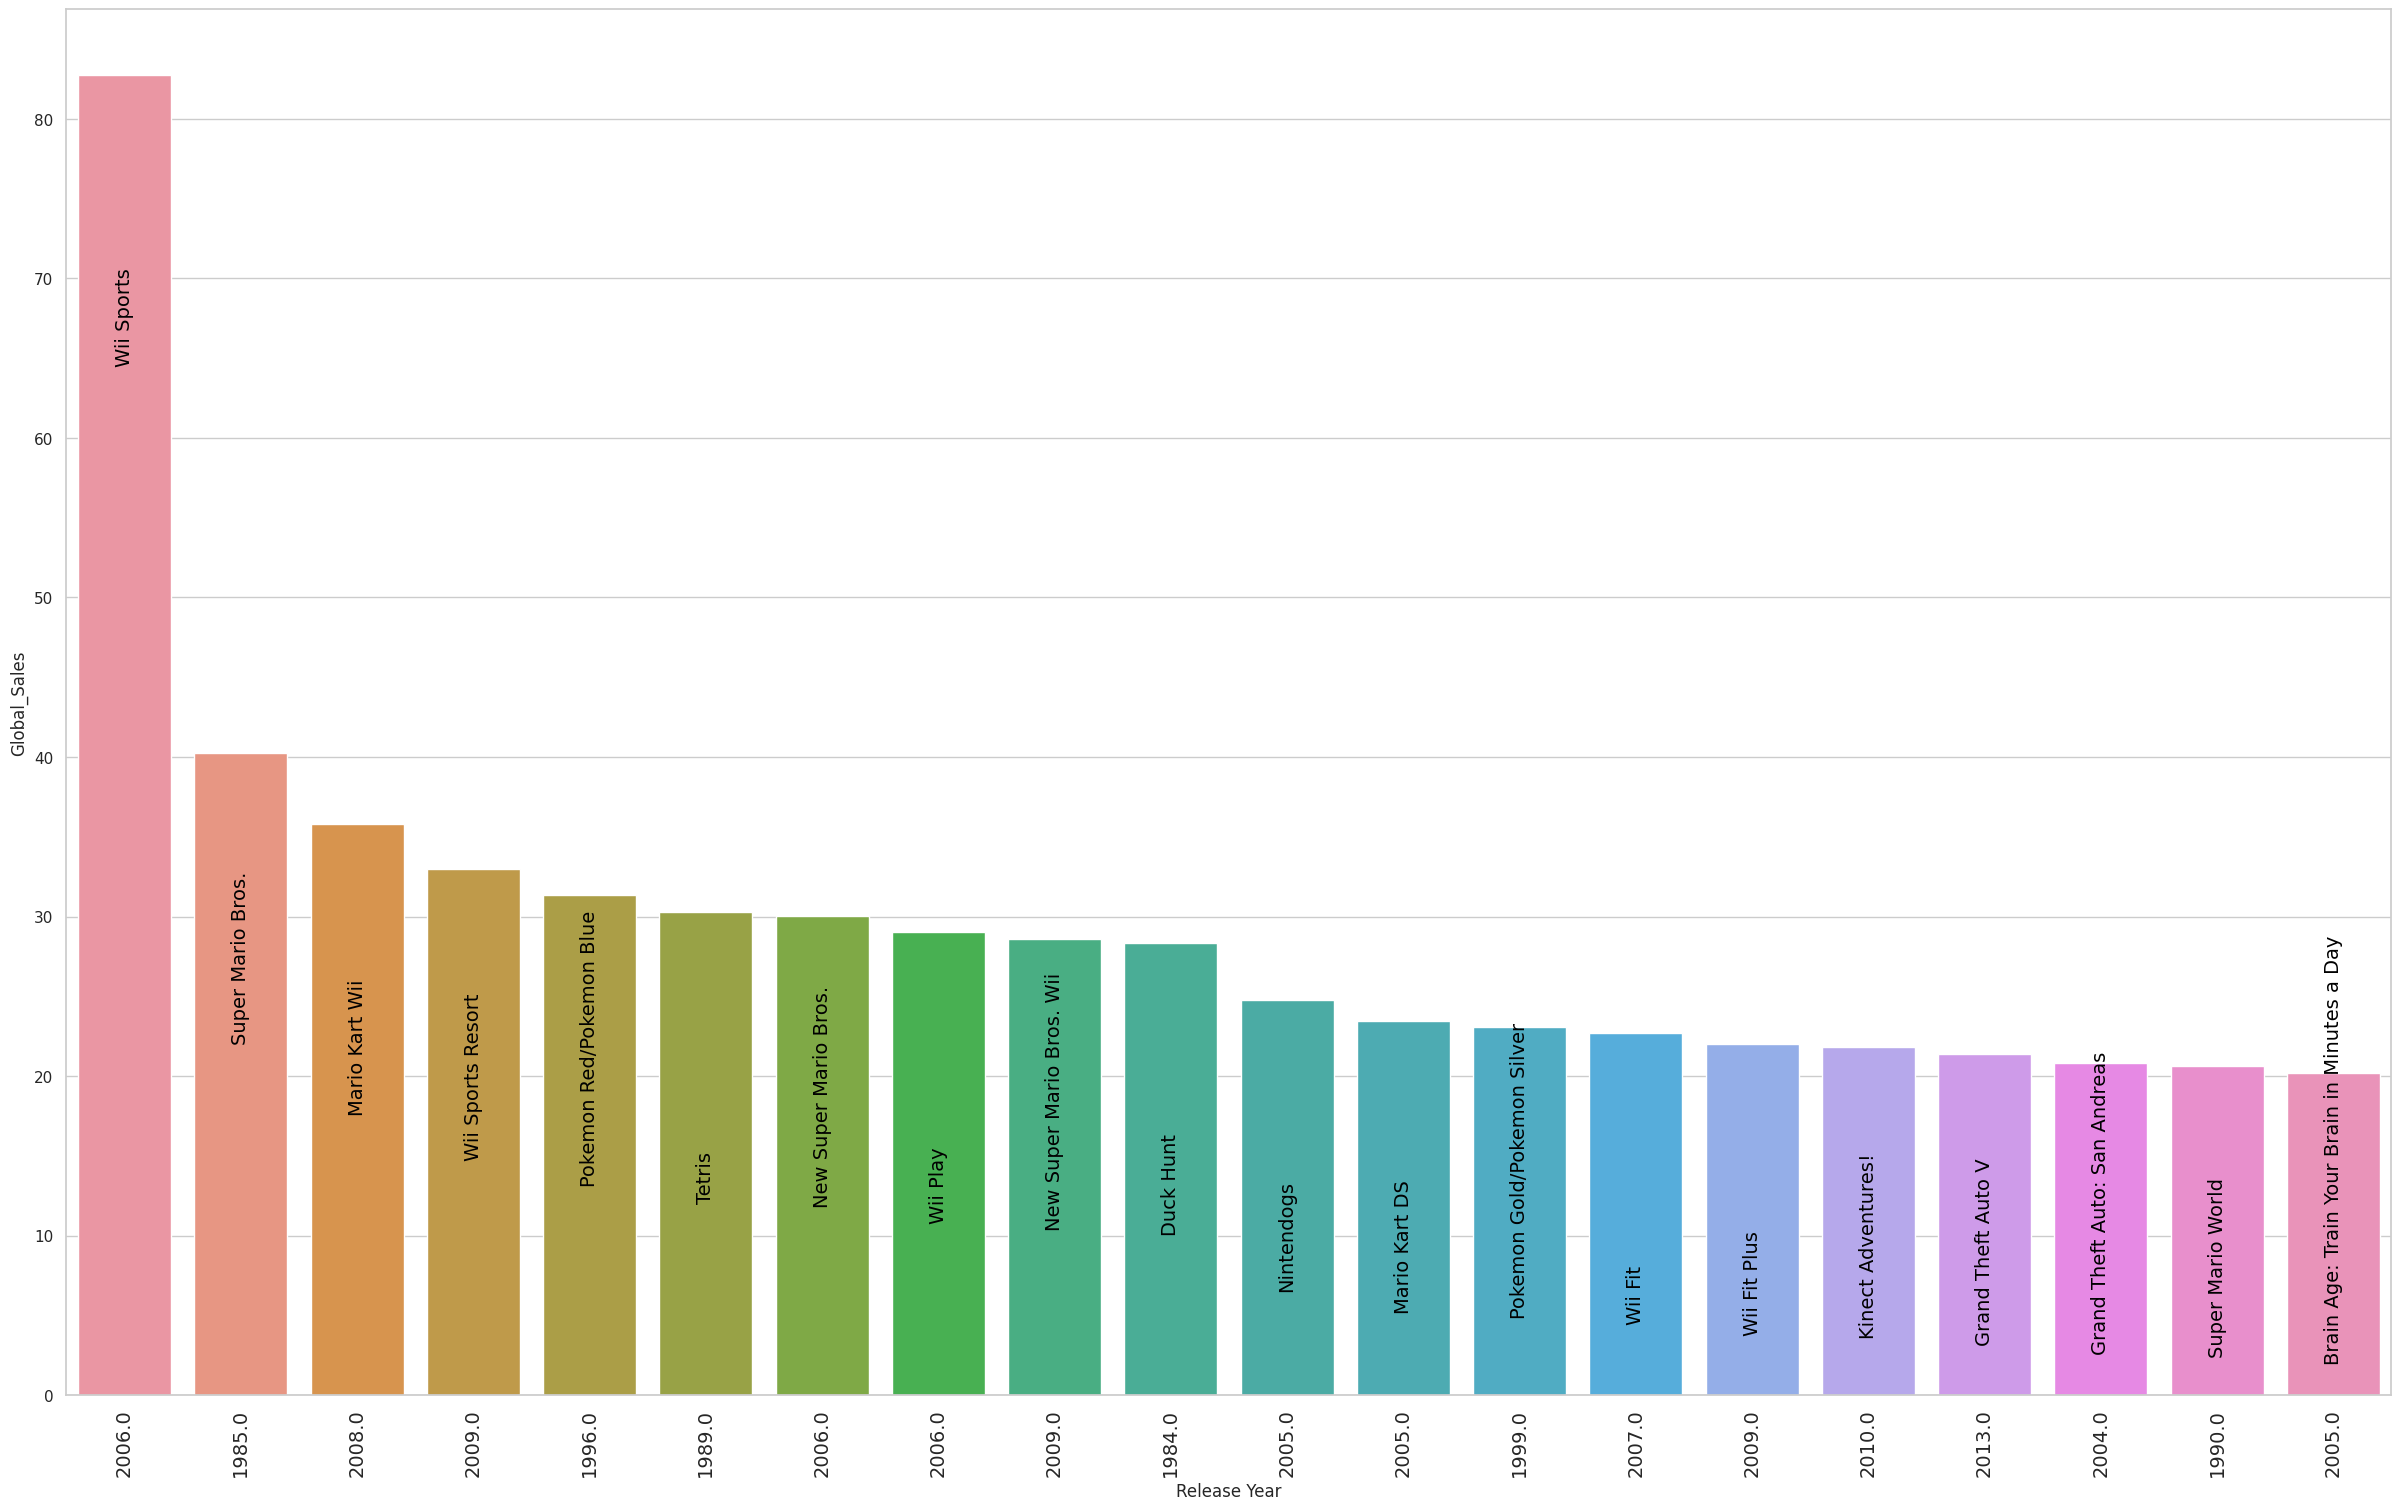

In [65]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x = 'Name', y = 'Global_Sales', data = top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation=90, ha='center')
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

- And The winner is Wii Sports<br>
ME => Ok jaber i thought you asked me too many questions. Can you hold it for time being, i will show you something interesting Jaber => Ok, i have no problem let's start

### 10. Sales compearison by genre

In [66]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

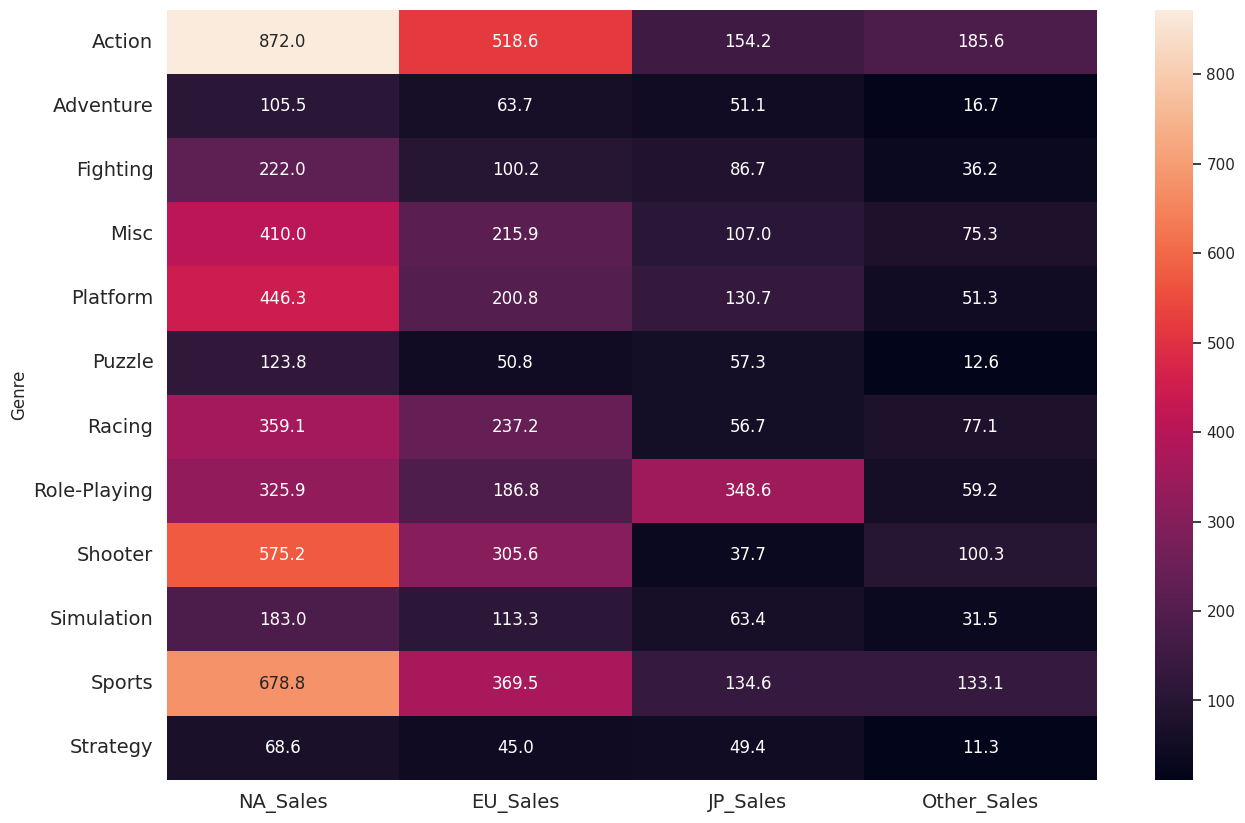

In [67]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt='.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [68]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_Price'>

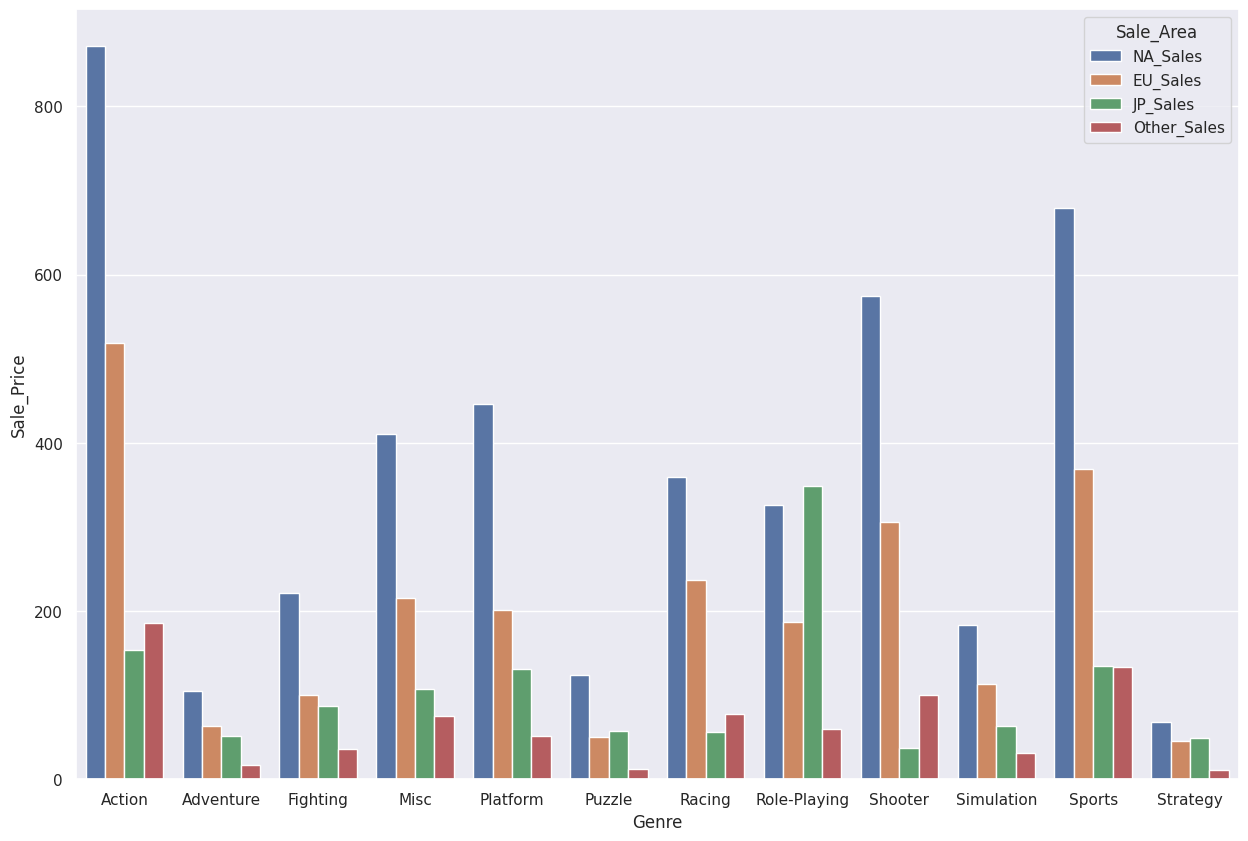

In [69]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

Me => See, Here Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time. Its look like they love video games most

### 11. Sales compearison by platform

In [70]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [71]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [72]:
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


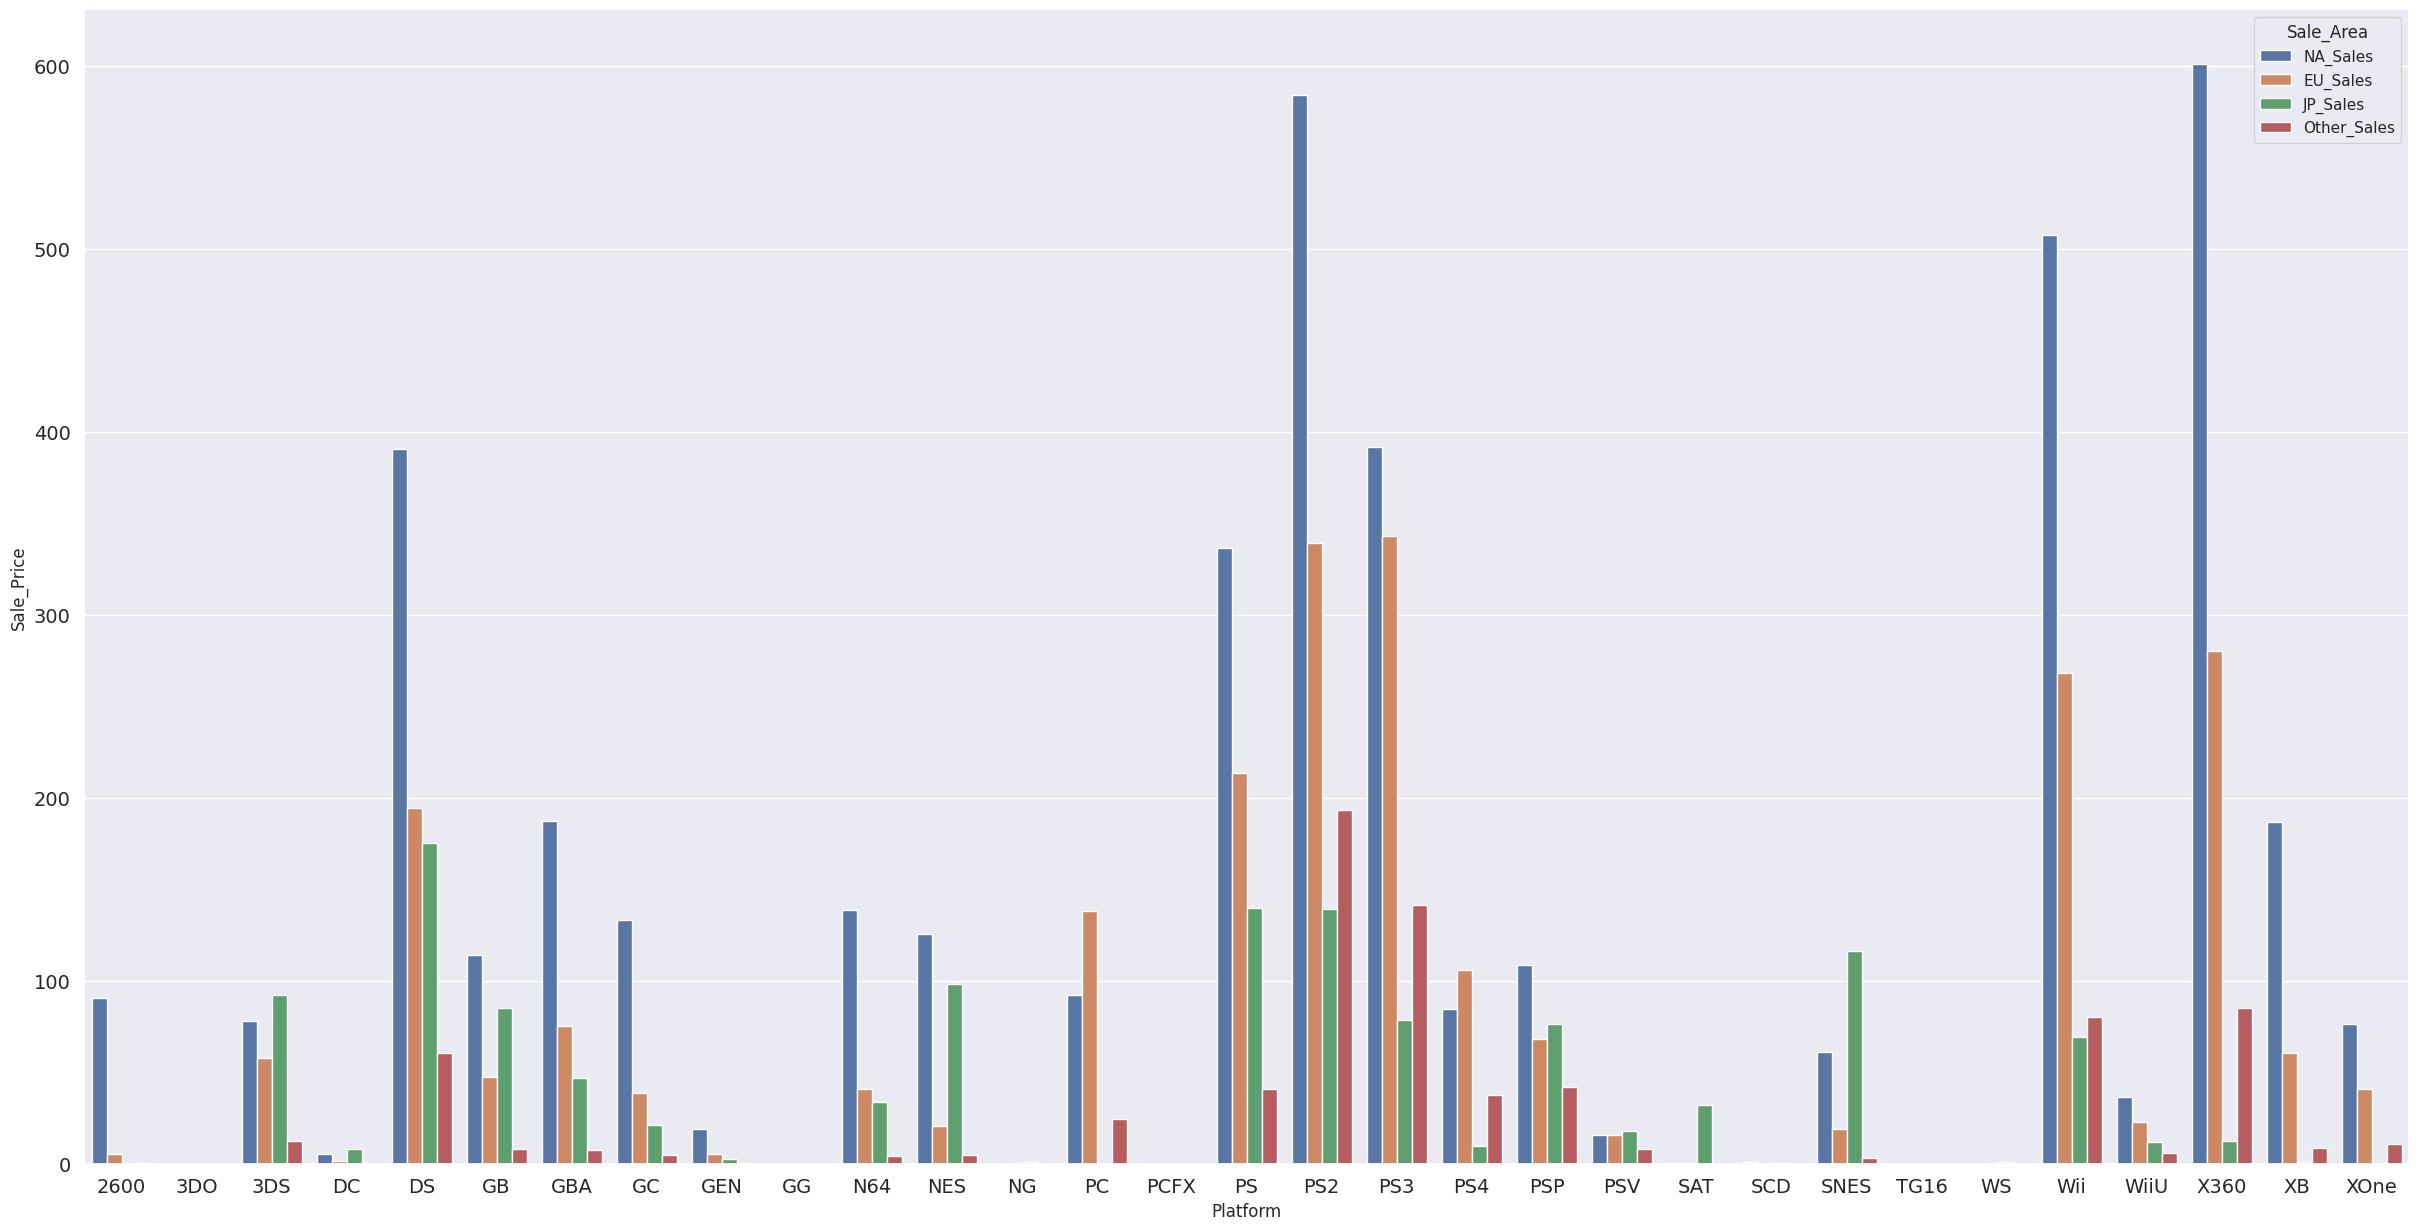

In [73]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

ME => It's clearly shown that X360, Wii, and PS are market leader. and north america always top. i have a question in my mind why they play video games most?

### 12. Top 20 Publisher

In [74]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

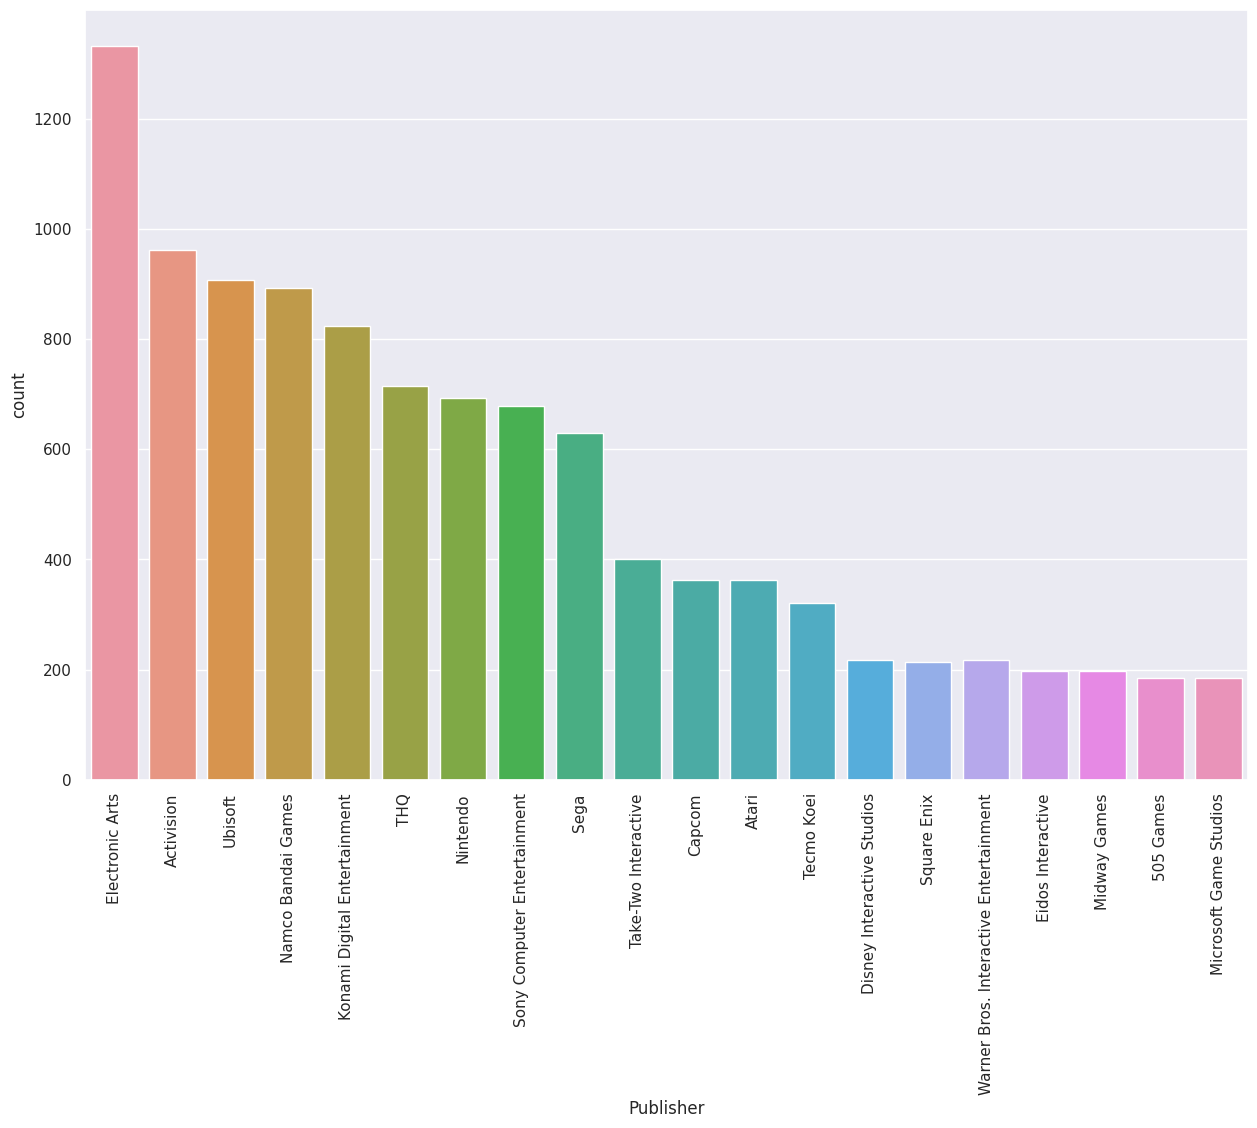

In [75]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Publisher', data=data, order=data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

- Jaber => Electronic Arts 1339, its huge
- Me => Thank you EA Sports for giving us too many games.
### 13. Top global sales by publisher

In [76]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

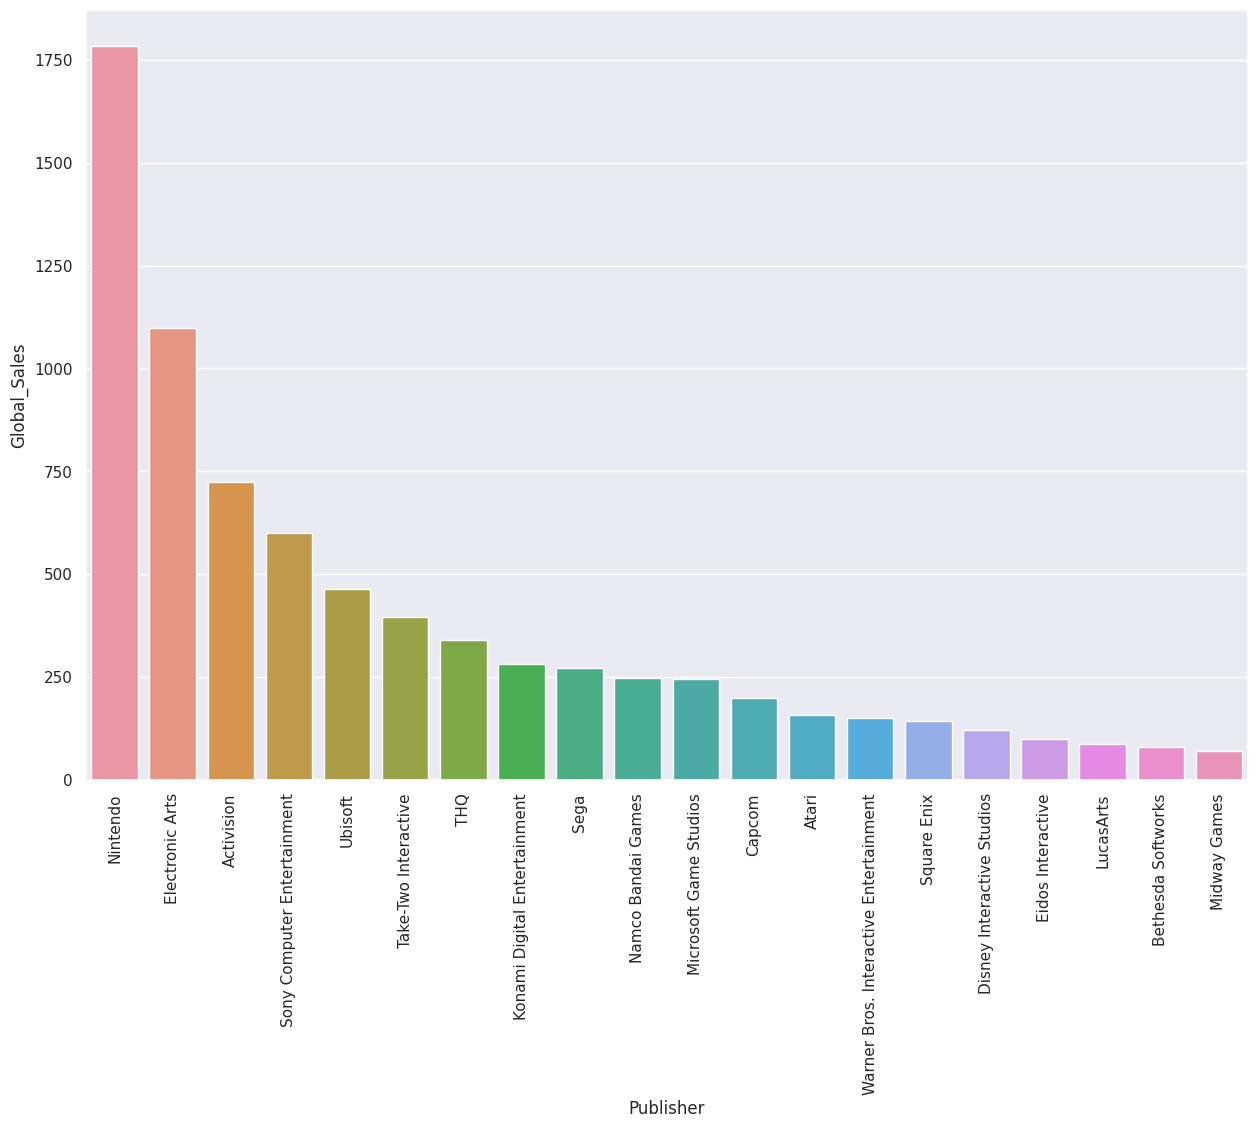

In [77]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

- ME => Wow its awesome Nintendo earns more rather than others. where respectively they are not releases much games.
- Jaber => Till now Nintendo release 696 games. are you dont think its not huge?
- Me => Yeah maybe, but they are not top 5 publisher
### 14. publisher comperison¶

In [83]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [84]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)

In [85]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


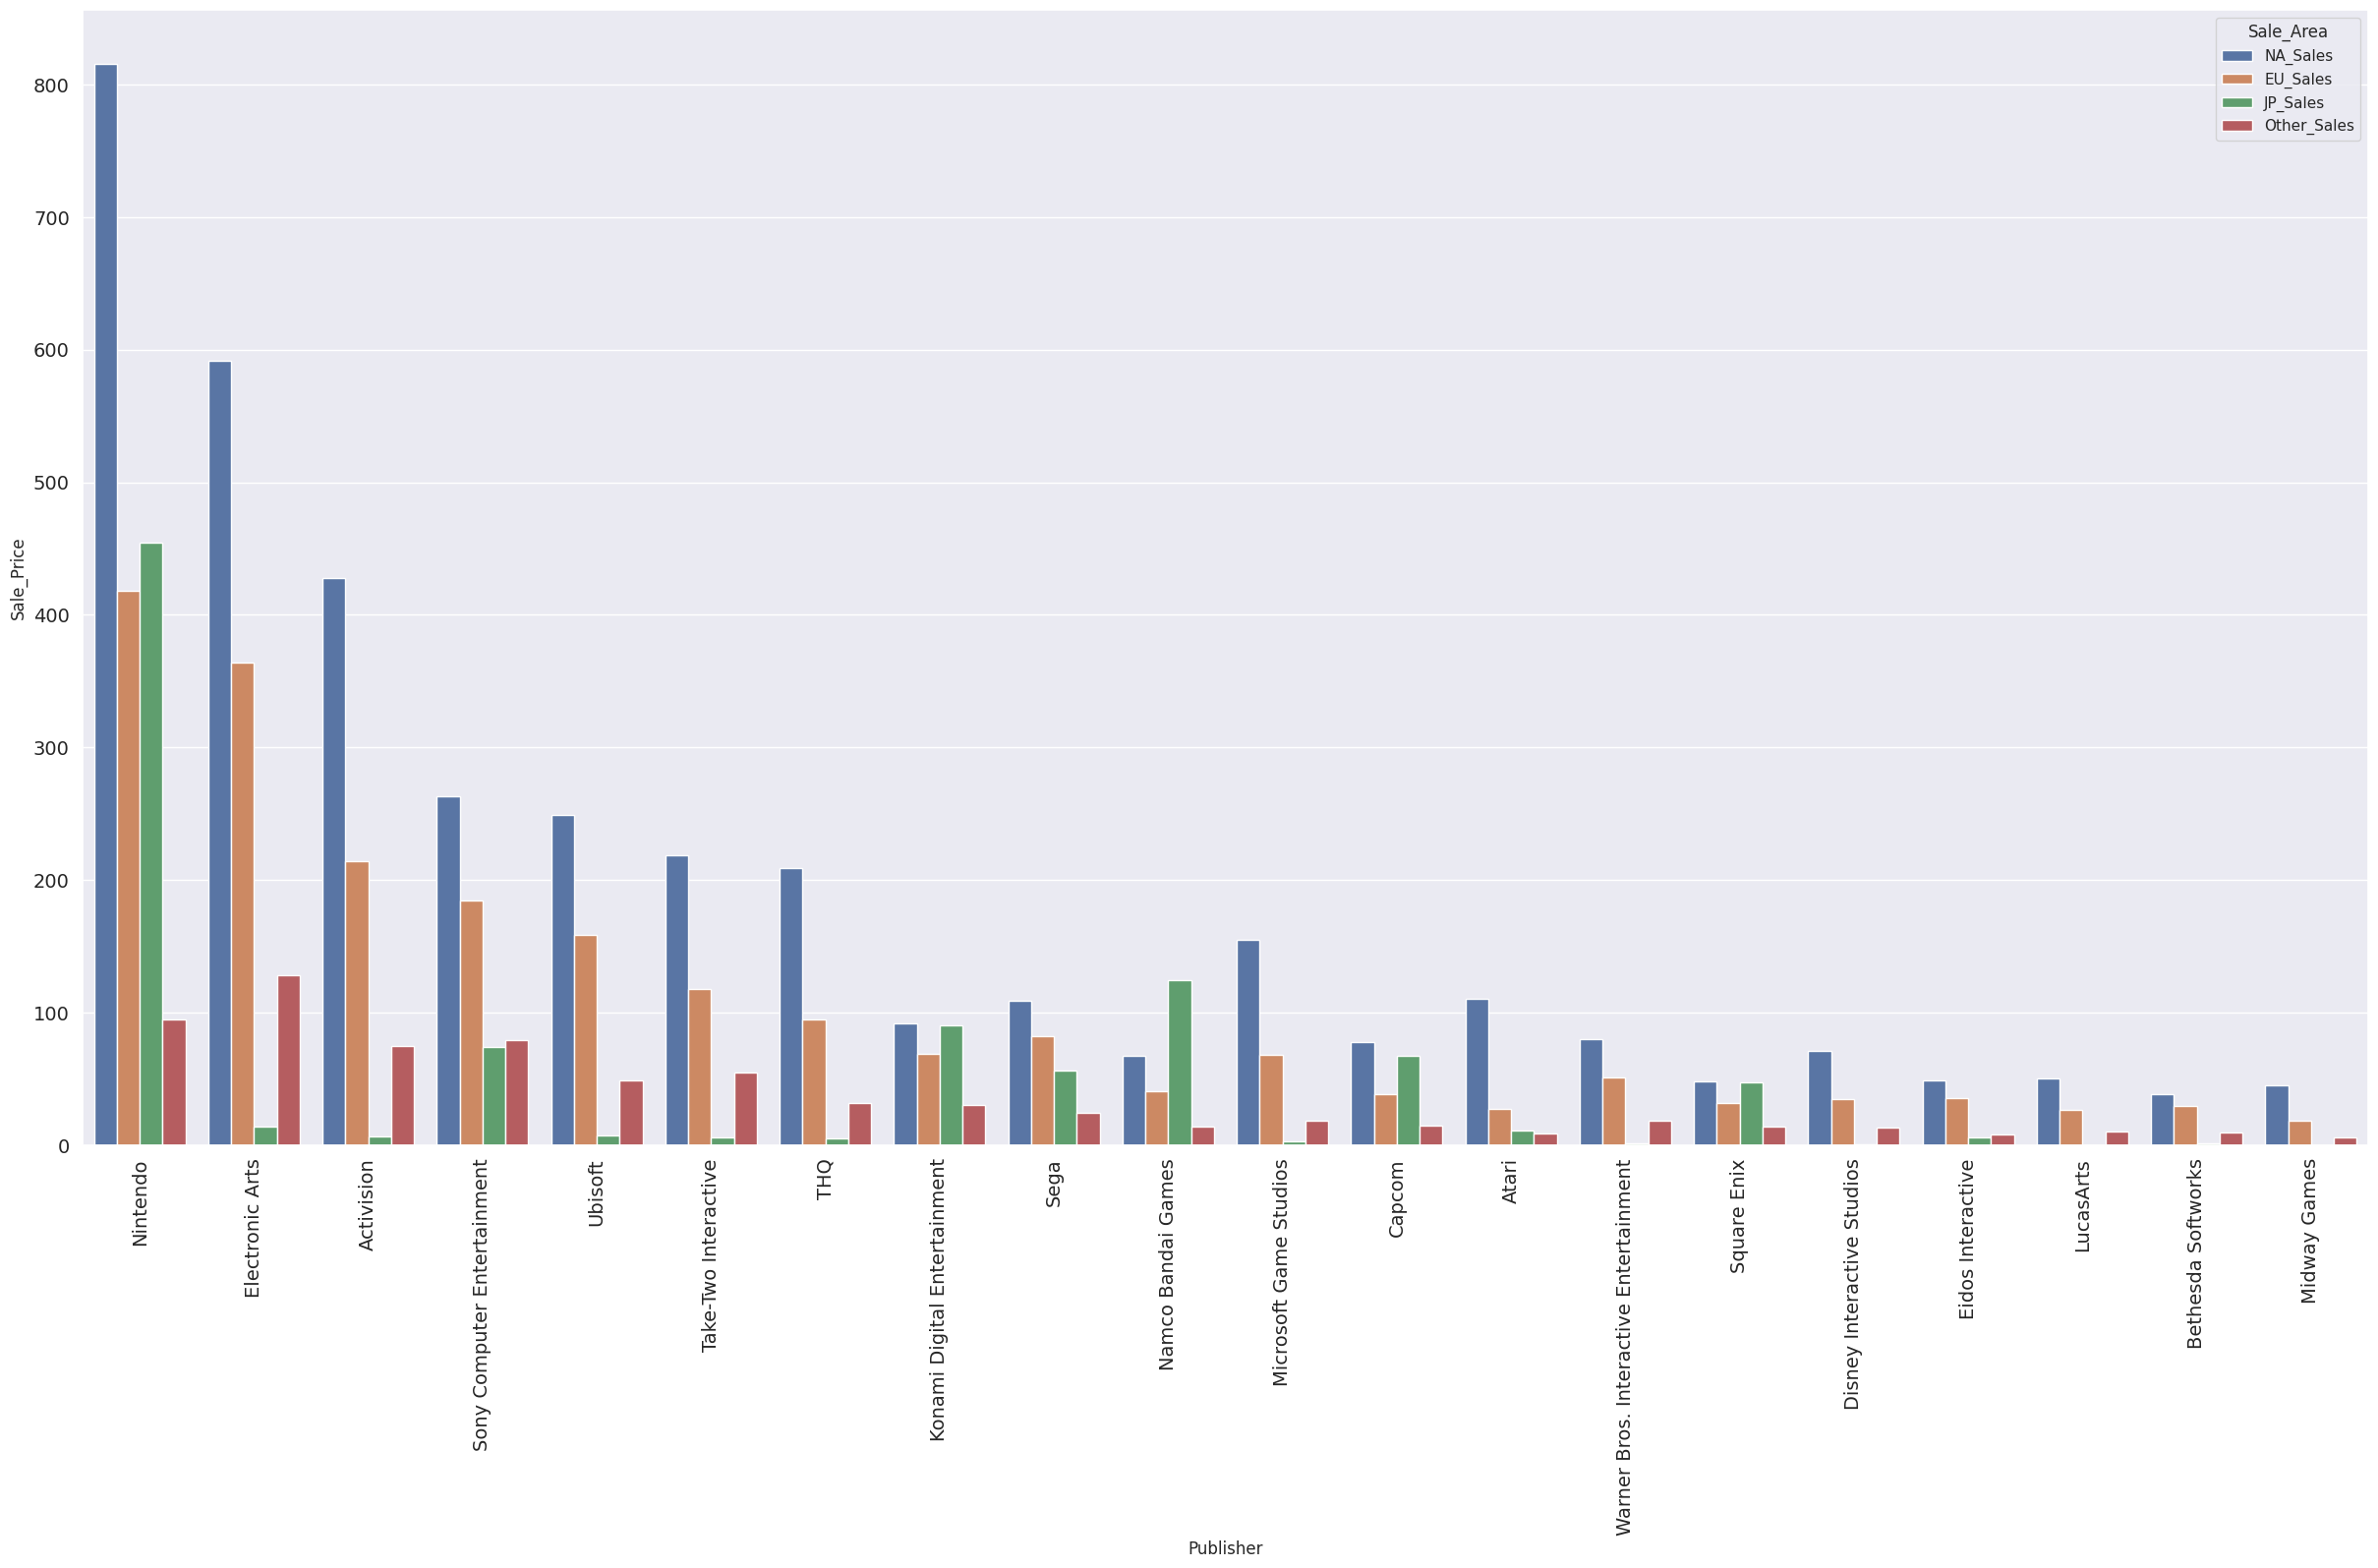

In [86]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

### 15. Top publisher by Count each year

In [87]:

top_publisher = data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx = top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=['Year', 'Count'], keep='last').reset_index(drop=True)

In [88]:
publisher = top_publisher_count['Publisher']

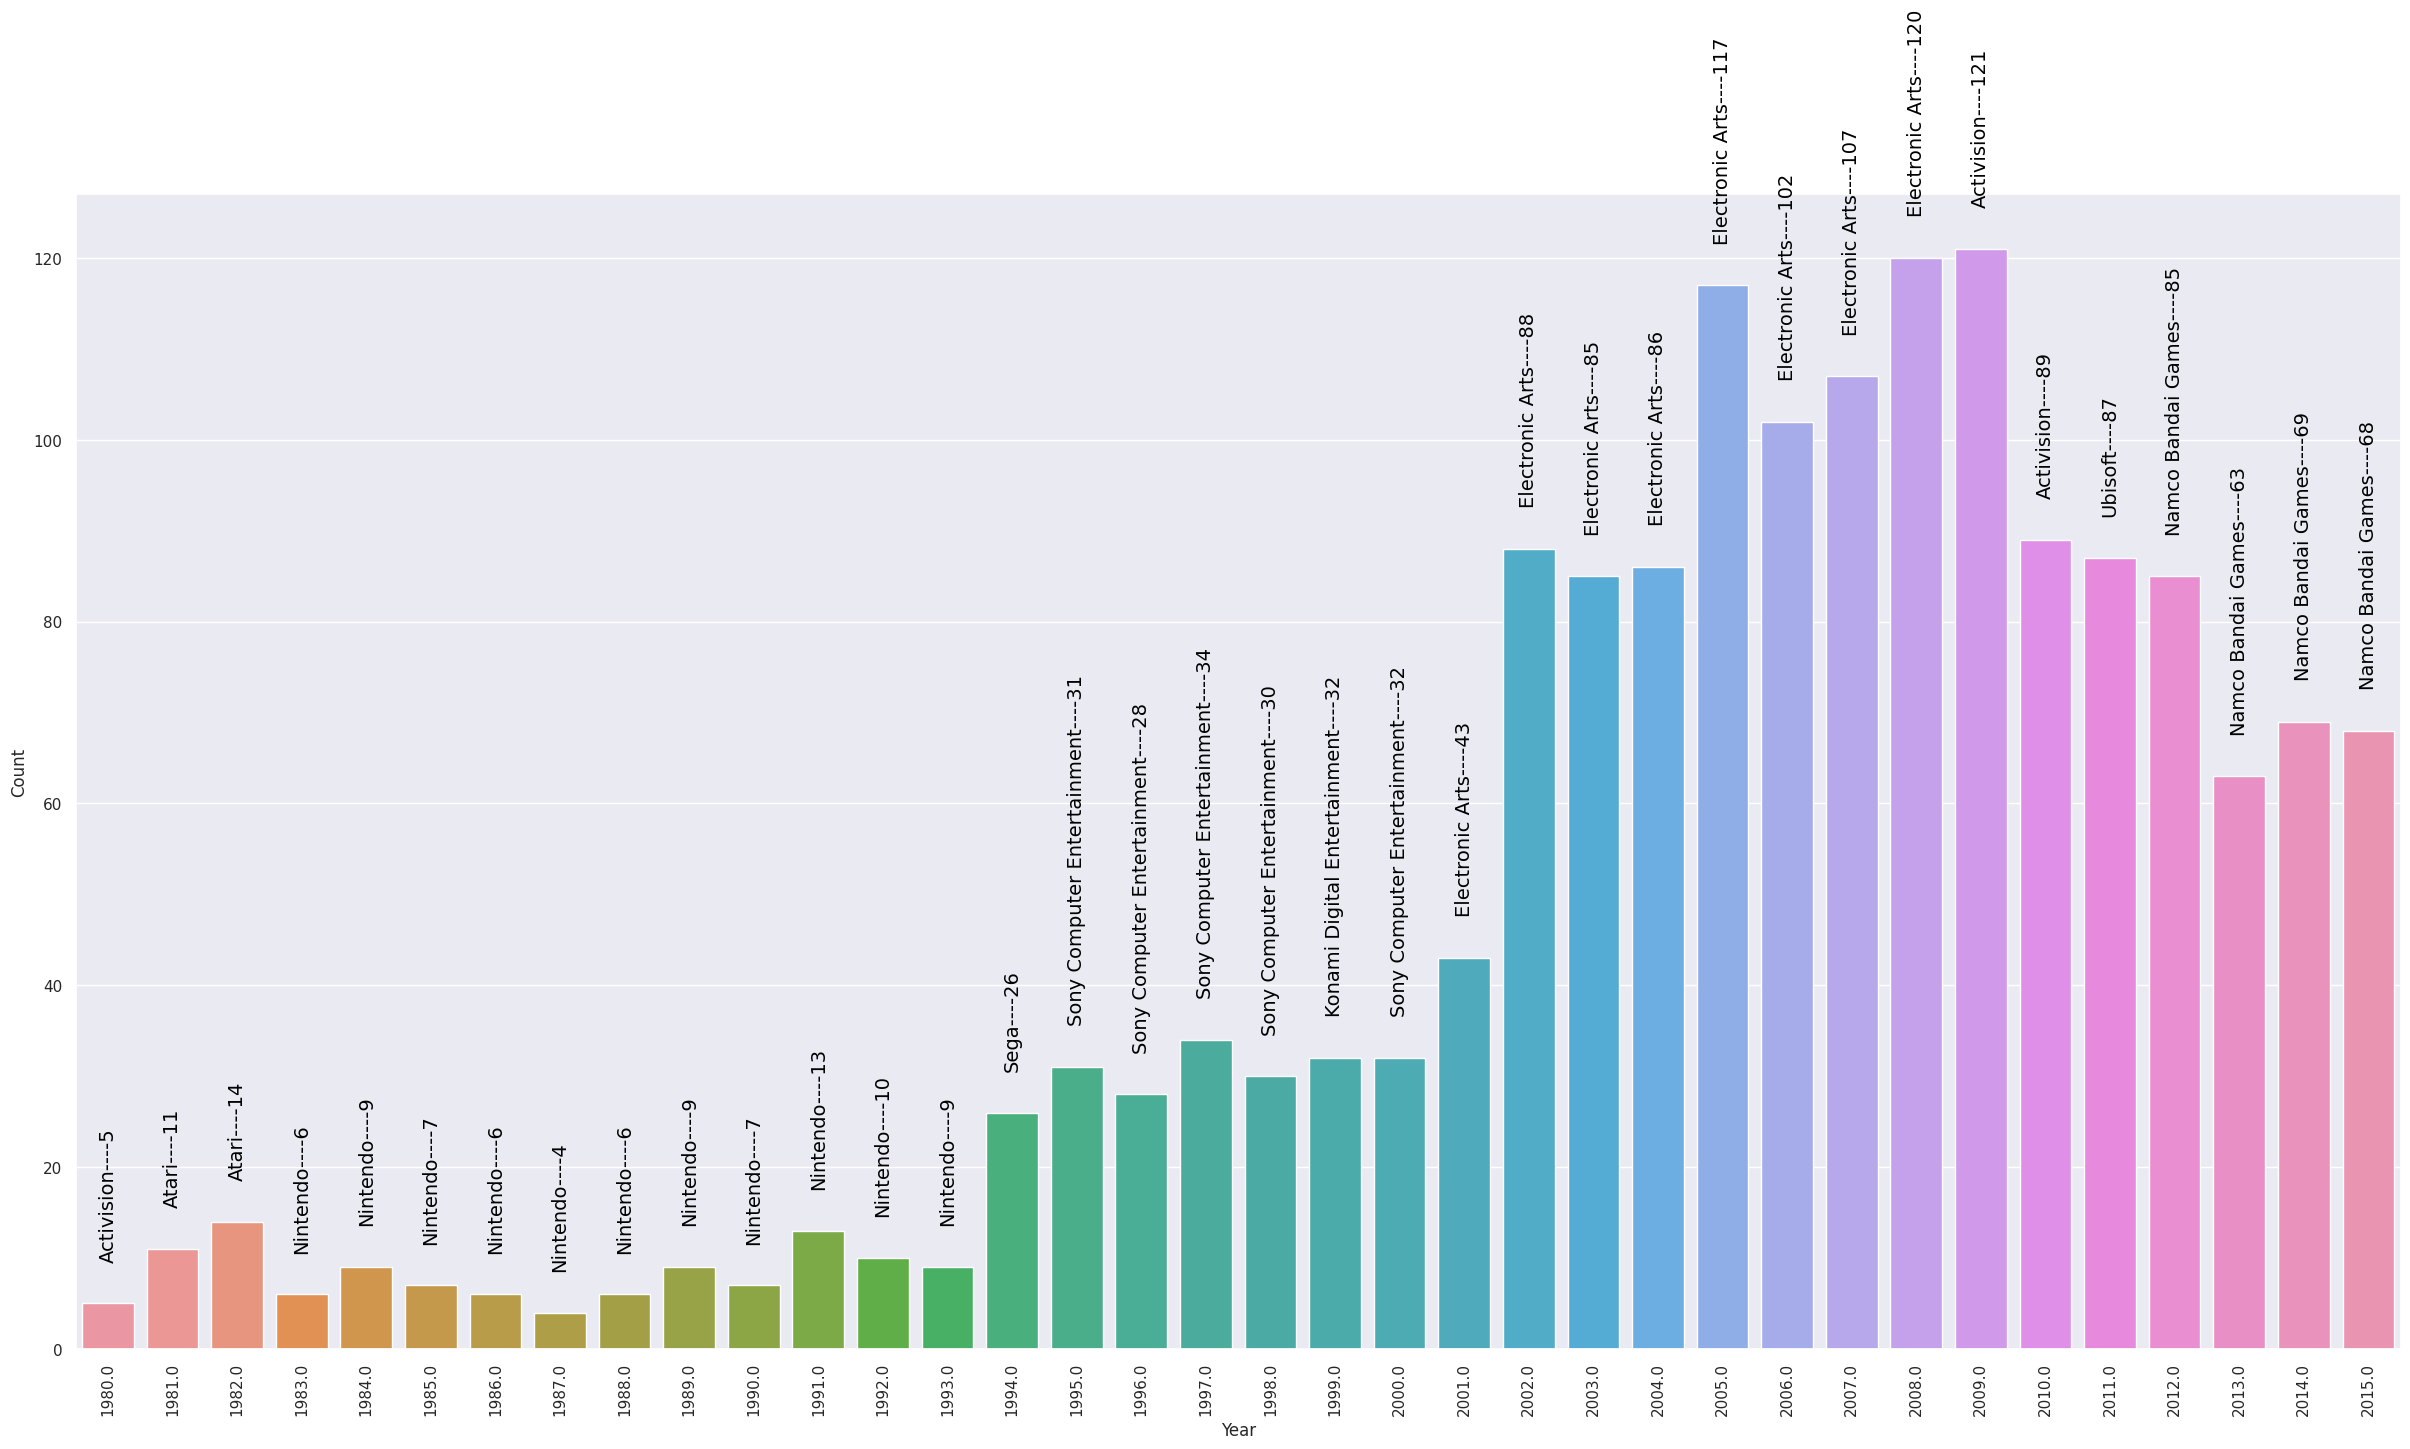

In [89]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data = top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
    g.text(index, value+5, str(publisher[index] + '----' + str(value)), color='#000', size=14, rotation=90, ha='center')
    index += 1

plt.xticks(rotation=90)
plt.show()

### 16. Total revenue by region

In [91]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={'index':'region', 0:'sale'})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<Axes: xlabel='region', ylabel='sale'>

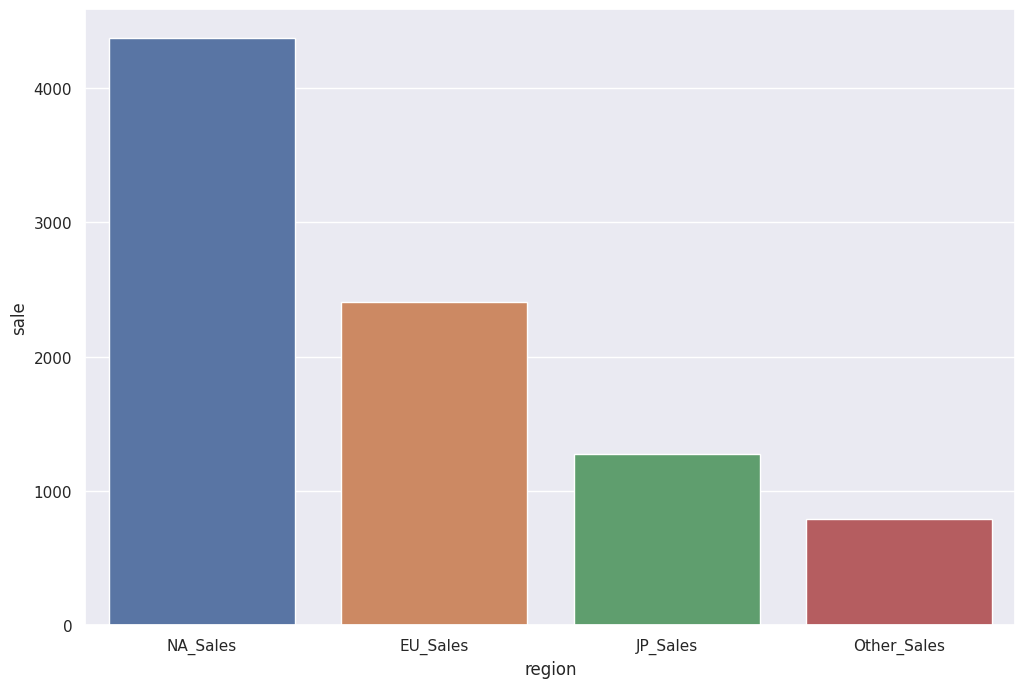

In [92]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data=top_sale_reg)

pie chart of region sale

In [93]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x7f09689a1640>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

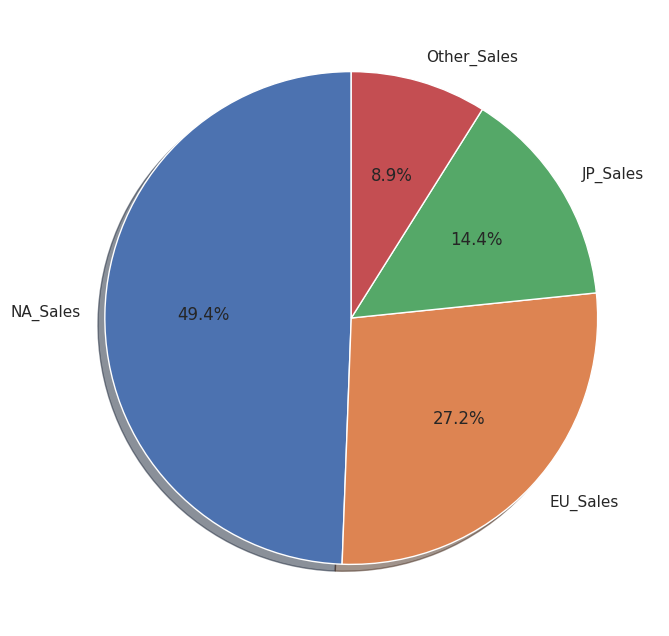

In [94]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

North America almost Cover 50% of sales

### 17.Sales Histogram

/tmp/ipykernel_3575/1893630486.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)


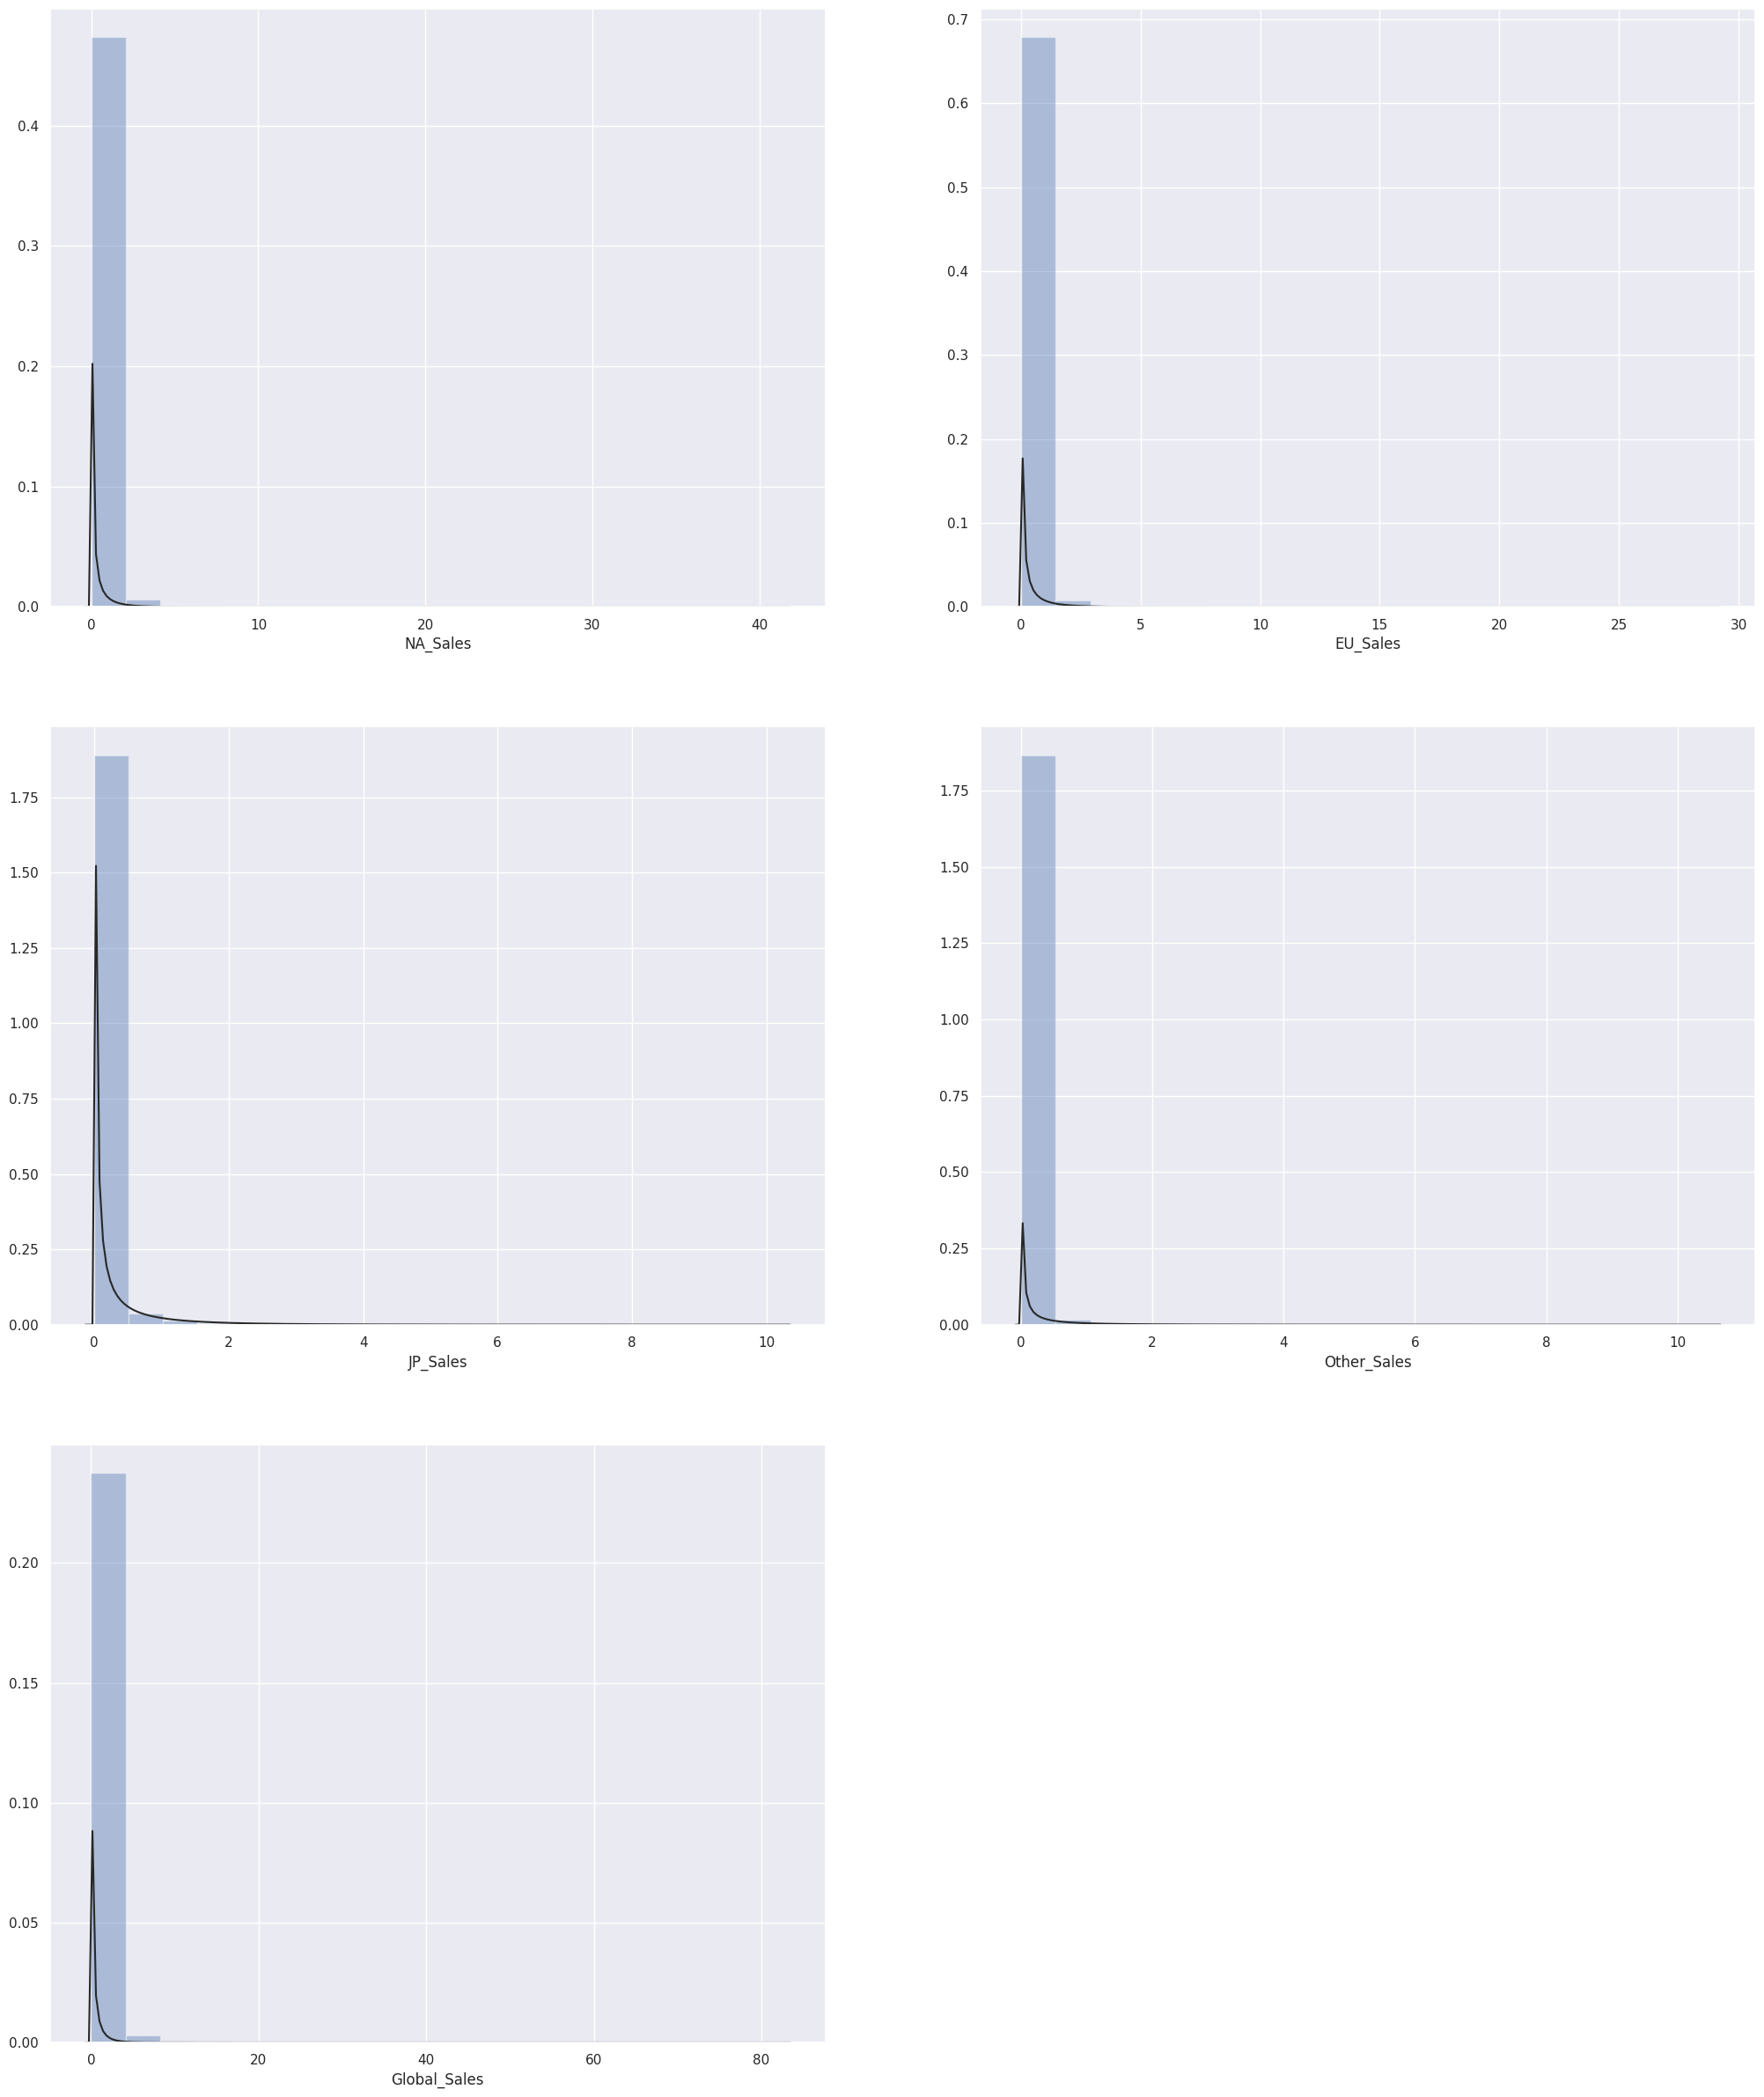

In [95]:
plt.figure(figsize=(25, 30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

Distribution After log transformation

In [96]:
data_hist_log = data.copy()

In [98]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0 ]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0 ]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0 ]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0 ]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0 ]

/tmp/ipykernel_3575/292392359.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns. distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)


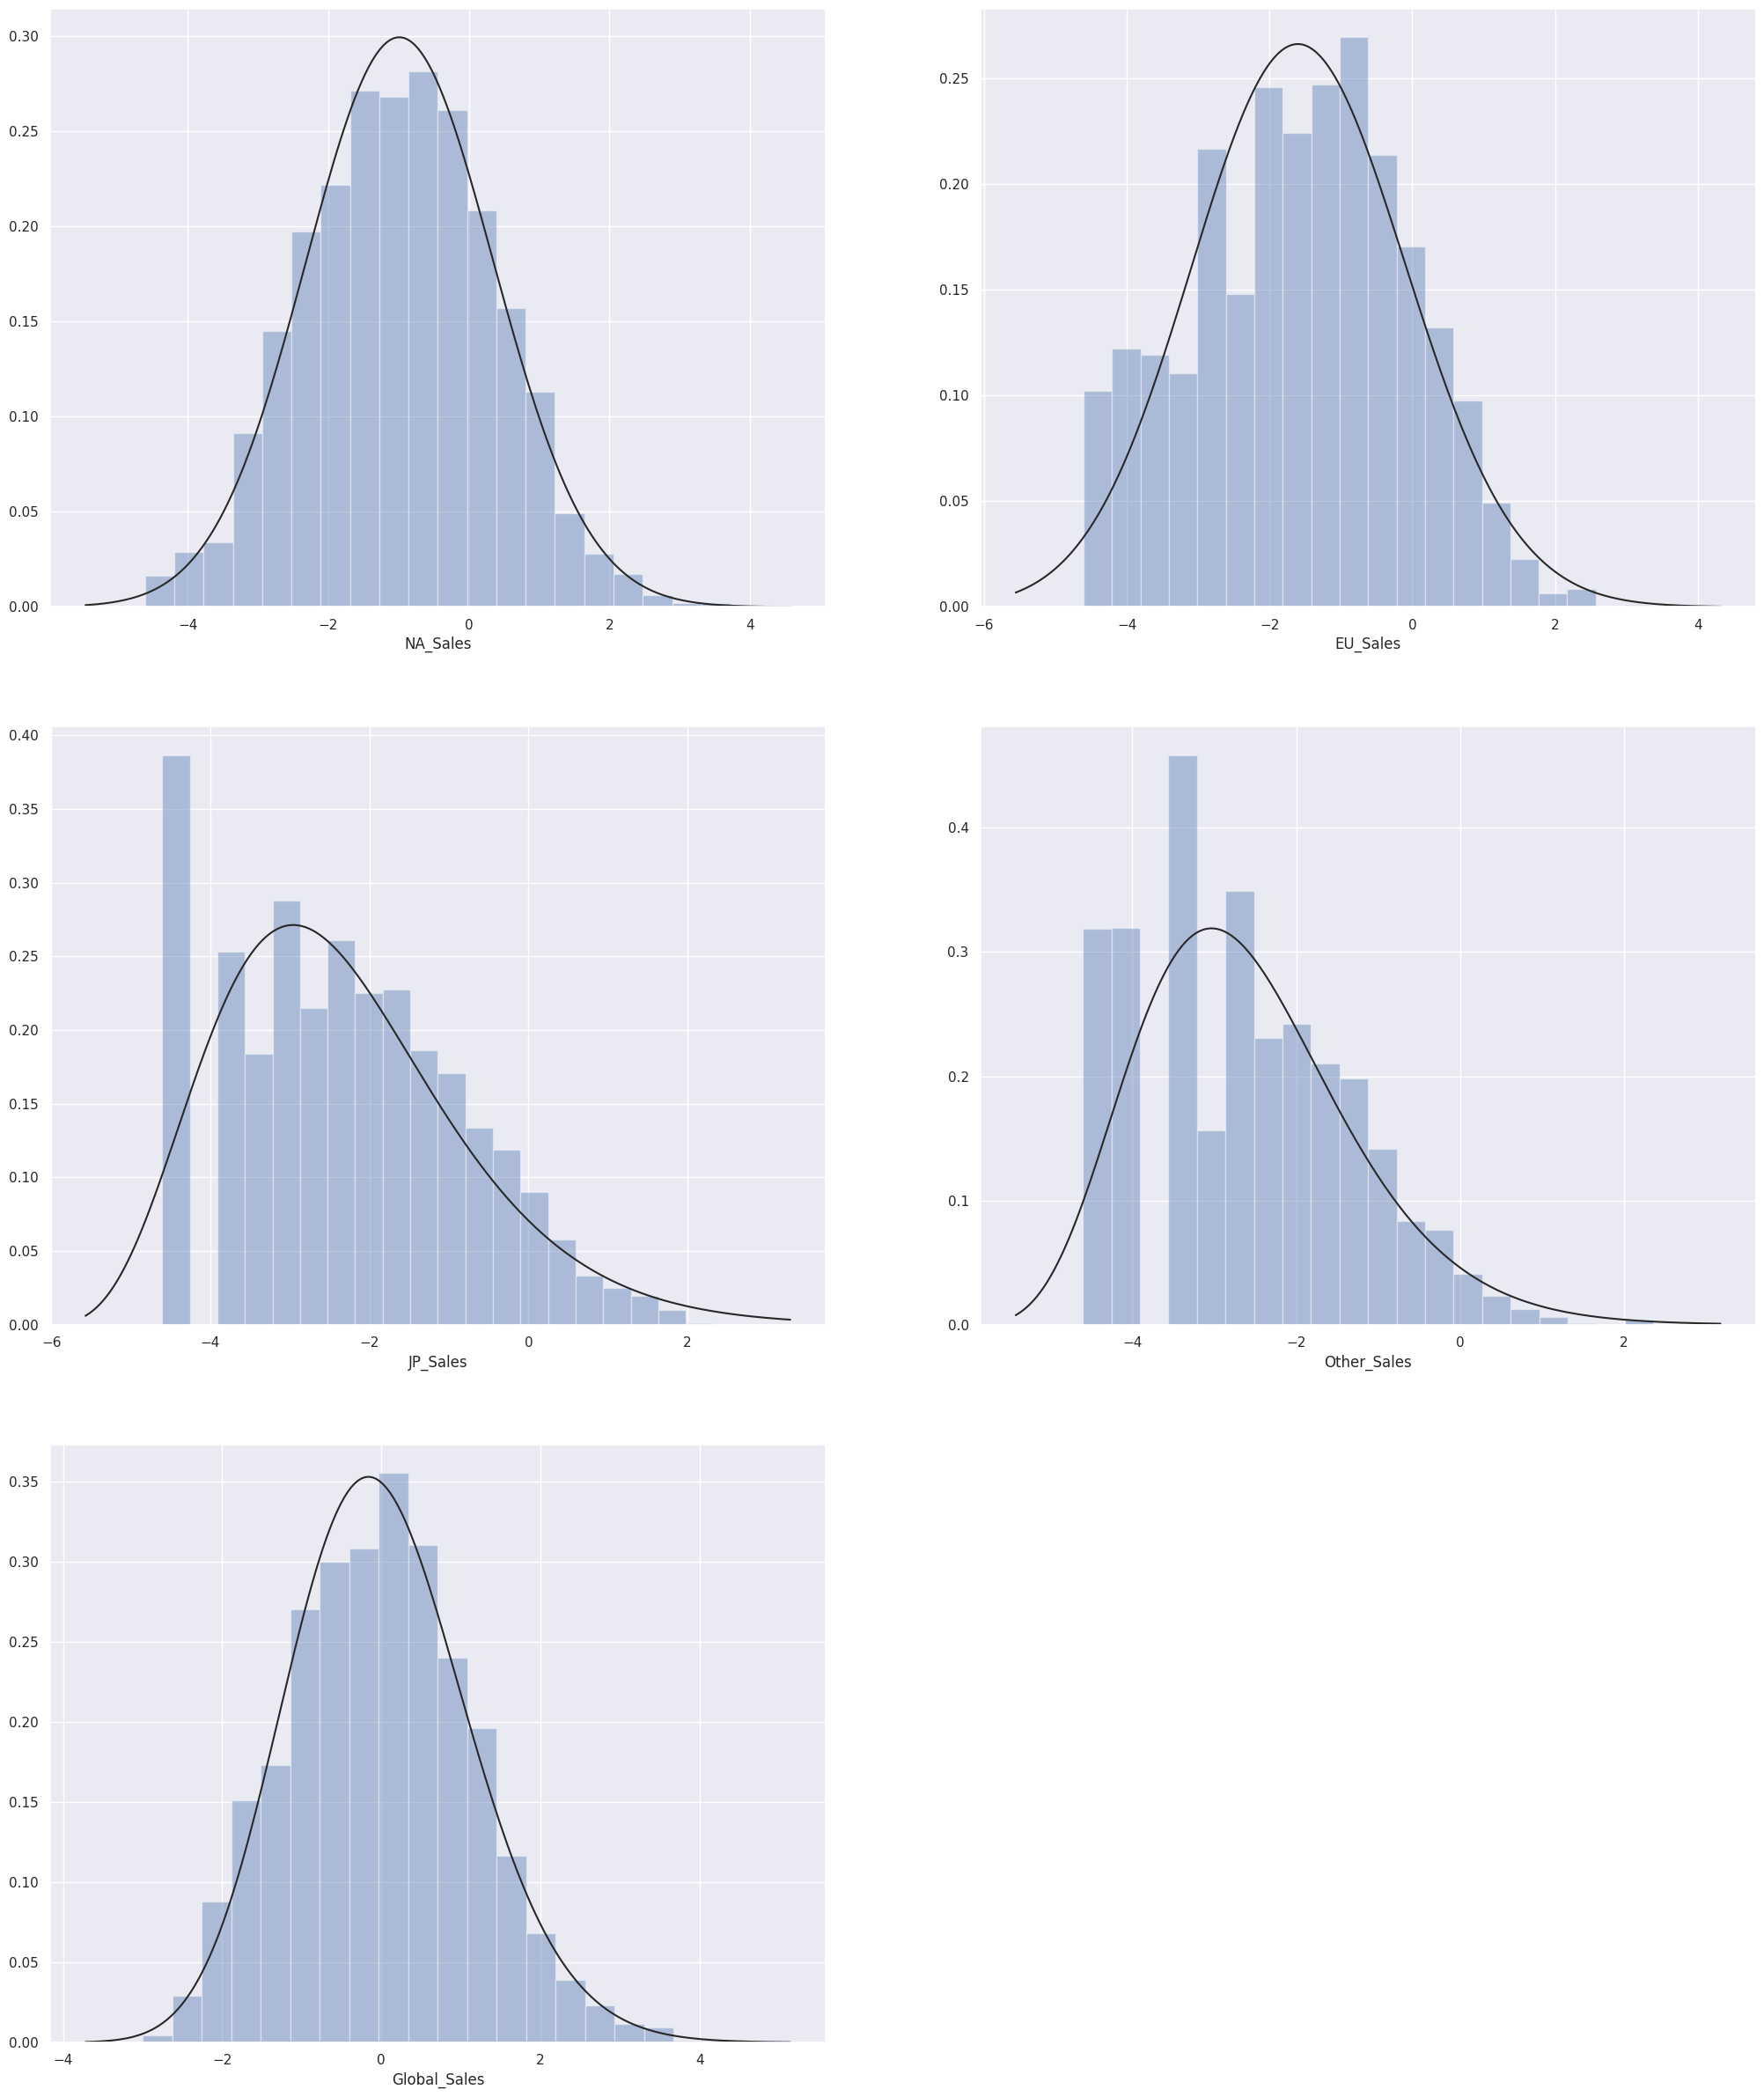

In [100]:
plt.figure(figsize=(25, 30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3, 2, i+1)
    sns. distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

You can see their skewness and central tendency, we can say that our almost all data are right skewed and symmetric skewed after log transformation

### 18. Relations of Columns

#### heatmap
heatmap is a good way to understand correlation

<Axes: >

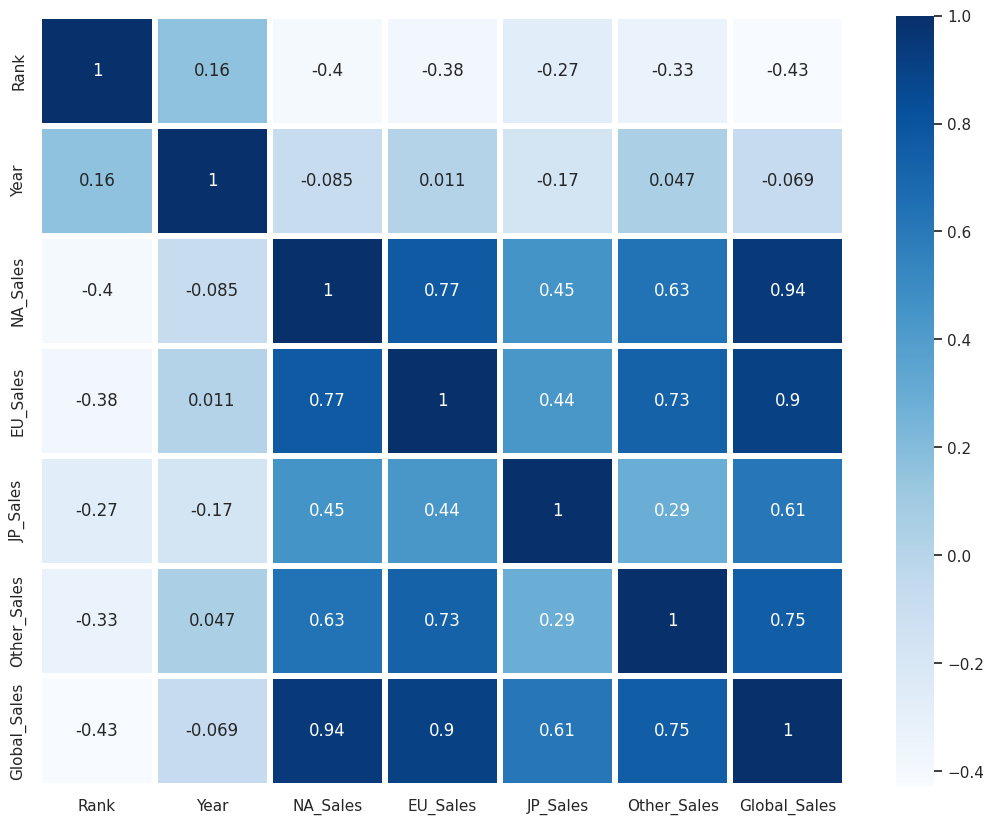

In [116]:
plt.figure(figsize=(13,10))
sns.heatmap(data.select_dtypes(include=np.number).corr(), cmap = "Blues", annot=True, linewidth=3)
# 현재 dataframe.corr는 모든 문자에 대해 corr()을 시행하려 하고 숫자형에 관한 corr만 필요로 하기 때문에 .select_dtype을 이용해 숫자형만 뽑아서 corr()을 진행한다.

In [115]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_Sales are mostly corelated

#### Pair plot

In [104]:
data_pair = data.loc[:, ['Year', 'Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'Other_Sales']]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


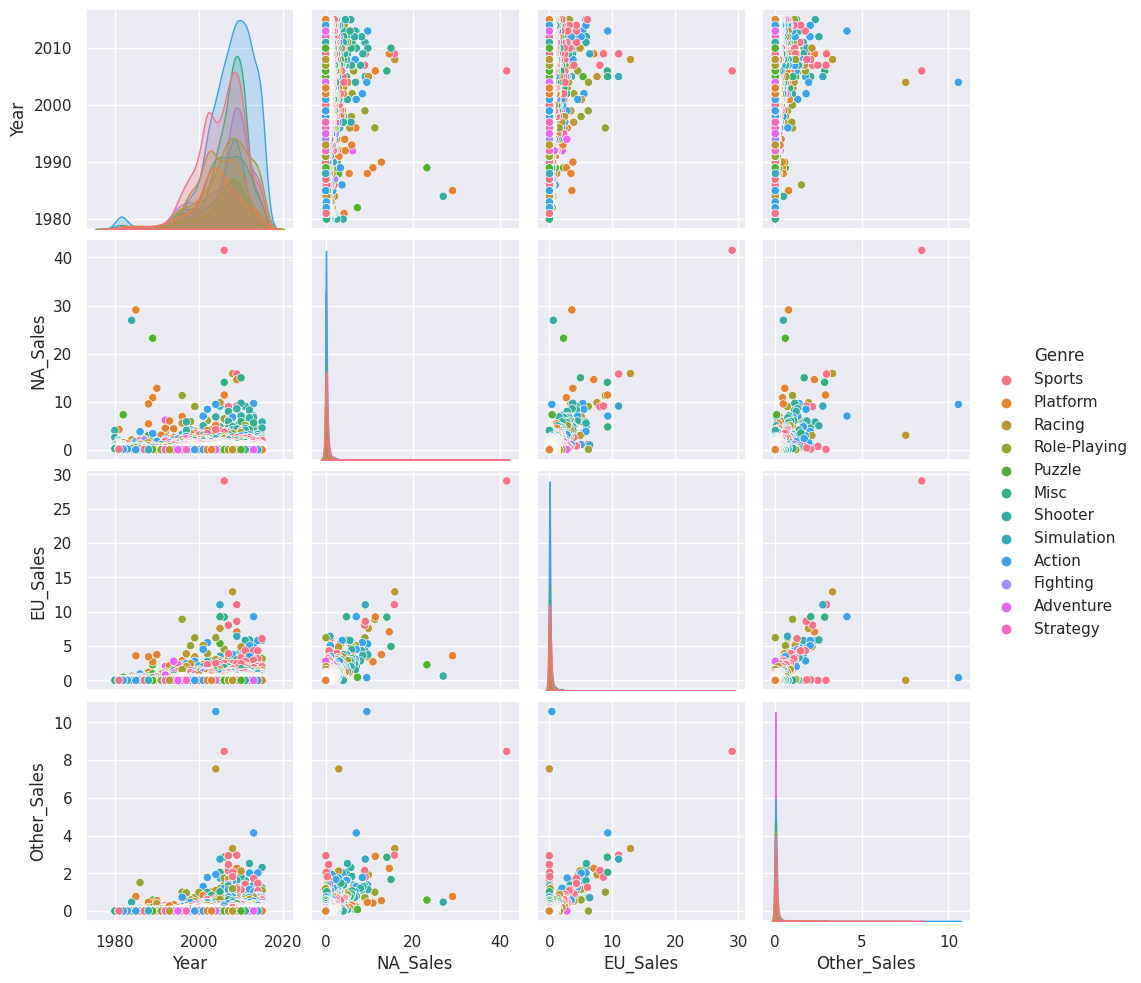

In [105]:
sns.pairplot(data_pair, hue='Genre')

#### log work

In [106]:
data_pair_log = data_pair.copy()

In [107]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [108]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [109]:
data_pair_log

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
14071,1998.0,PC,Role-Playing,0.01,0.02,0.01
14183,2014.0,PS3,Racing,0.02,0.01,0.01
14185,2011.0,PC,Puzzle,0.01,0.02,0.01
14267,2007.0,PC,Puzzle,0.01,0.02,0.01


In [111]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

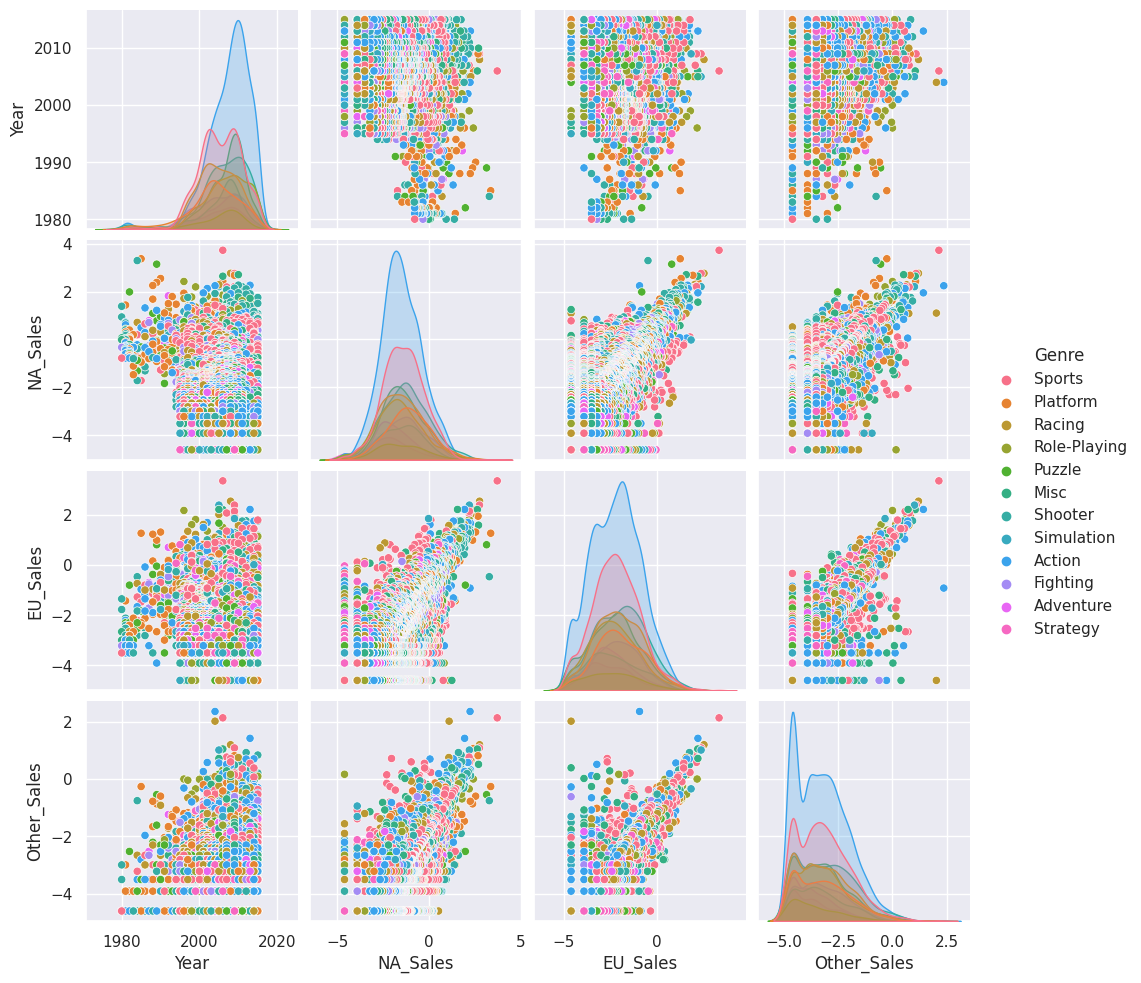

In [112]:
sns.pairplot(data_pair_log, hue='Genre', palette='husl')

- Me => Ok thats all jaber. are you get all your question answer.
- Jaber => Yah i get, but i have also some questions yet.
- Me => Not today jaber, it's already late night we will do it another day. ok.
- Jaber => Okk.
### Note:
You already find out that it was just a imaginary story. But truly jaber is real person, he is my room mate also and he loves game too much. I just imagin this story and made it with a little fun. Hope you like it.
#### If you like this note book please give me an up vote
Thank You ..............